In [549]:
# Importing Libs
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np

import milanesas.eda_helper as eh

from toolkit.tools import (
    get_color,
)


%matplotlib inline

In [550]:
plt.rcParams["figure.figsize"] = [12, 7]

In [551]:
# Setting seaborn as default plotting lib.
sns.set()
sns.set_palette("pastel")

In [552]:
df = pd.read_csv("../enc_devs_py_2021_fixed.csv")

In [553]:
from IPython.core.display import HTML as Center

Center(
    """ <style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style> """
)

In [554]:
gen_repl = {
    "HOMBRE": "MAN",
    "MUJER": "WOMAN",
    "NO COMPARTO": "DONT SHARE",
}


eh.replace_column_content(df, "genero", gen_repl)

# EXPERIENCIA

    - Sobre la 'experiencia' de las personas que respondieron la encuesta.

Experiencia de los Encuestados

La experiencia laboral de los participantes en la encuesta es un factor clave para comprender el panorama del sector IT en Paraguay. Analizar los datos de la encuesta sobre la experiencia de los encuestados nos permitirá identificar las necesidades del mercado laboral y las competencias que buscan las empresas.

Preguntas a explorar:

    ¿Cuál es la experiencia laboral promedio de los encuestados en el sector IT?
    ¿Los encuestados han trabajado en diferentes empresas del sector IT o se han mantenido en una sola empresa a lo largo de su carrera?
    ¿Qué tipo de experiencia laboral tienen los encuestados? (desarrollo de software, administración de sistemas, seguridad informática, etc.)
    ¿Los encuestados consideran que su experiencia laboral actual es relevante para su puesto de trabajo?
    ¿Cómo han adquirido los encuestados la experiencia laboral que tienen? (estudios formales, cursos de formación, experiencia laboral previa, etc.)
    ¿Los encuestados creen que la experiencia laboral es más importante que la educación formal para tener éxito en el sector IT?
    ¿Qué desafíos han enfrentado los encuestados en su experiencia laboral en el sector IT? (búsqueda de empleo, adaptación a nuevas tecnologías, falta de oportunidades de crecimiento, etc.)
    ¿Cómo pueden las empresas del sector IT mejorar la experiencia laboral de sus empleados? (capacitación y desarrollo, buenas prácticas de gestión de recursos humanos, salarios y beneficios competitivos, etc.)

Además de las preguntas anteriores, también se pueden analizar las respuestas de la encuesta teniendo en cuenta:

    Los años de experiencia: Se pueden segmentar los datos por grupos de años de experiencia para ver si hay diferencias en las habilidades, los salarios o las oportunidades de ascenso.
    El tipo de empresa: Se puede comparar la experiencia laboral de los encuestados que trabajan en empresas multinacionales, pequeñas y medianas empresas (PYMES) o startups.
    El nivel educativo: Se puede analizar si existe una correlación entre el nivel educativo de los encuestados y su experiencia laboral.

Al responder a estas preguntas, se podrá obtener una imagen más completa de la experiencia laboral de los profesionales de IT en Paraguay. Esta información será valiosa para:

    Las empresas del sector IT: para comprender las necesidades y expectativas de los trabajadores y mejorar sus estrategias de atracción y retención de talento.
    Las instituciones educativas: para adaptar sus programas de estudio a las necesidades del mercado laboral y preparar mejor a los estudiantes para el mundo laboral.
    Los formuladores de políticas: para diseñar políticas públicas que promuevan el desarrollo del sector IT y la empleabilidad de los trabajadores.

Tenga en cuenta que las preguntas específicas que formule dependerán de los datos que haya recopilado en su encuesta.

## GENERAL 

    Exploracion "general" sobre los aspectos relativos a la "experiencia" de los participantes en la encuesta.

In [555]:
df["exp_en_IT"].value_counts()

exp_en_IT
5-9      124
<5        94
10-14     82
15-19     20
20-24      9
25-29      5
30-34      4
35-39      2
>50        1
45-49      1
Name: count, dtype: int64

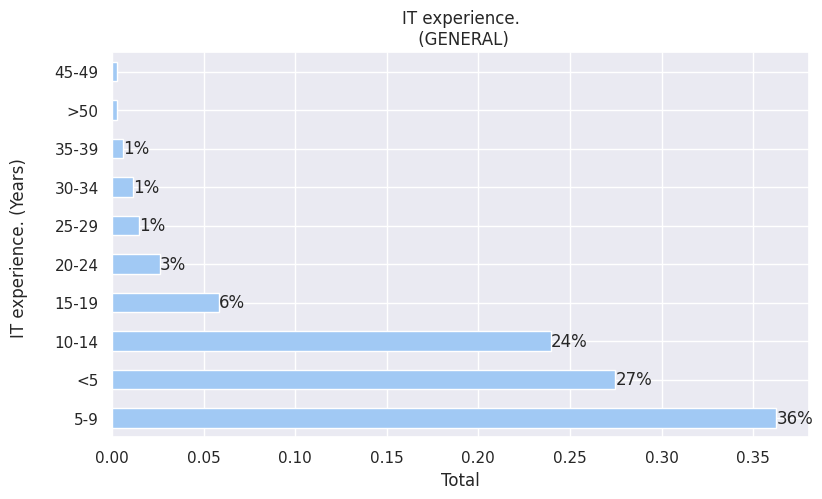

In [556]:
fig = plt.figure(figsize=(9, 5))


exp_ti_df = df["exp_en_IT"].value_counts(normalize=True)
exp_ti_plot = exp_ti_df.plot(
    kind="barh",
    title="IT experience.\n (GENERAL)",
)

exp_ti_plot.set_xlabel("Total")
exp_ti_plot.set_ylabel("IT experience. (Years) \n")


for k, v in enumerate(df["exp_en_IT"].value_counts(normalize=True).values):
    if v > 0.005:
        exp_ti_plot.annotate(eh.get_percentage(v), (v, k), va="center")

plt.show()

## Experiencia en TI. POR GENERO

In [557]:
gen = df.groupby("genero")
print(gen.groups.keys())

dict_keys(['DONT SHARE', 'MAN', 'WOMAN'])


### EXPERIENCIA EN TI - MANS

In [558]:
gen.groups

{'DONT SHARE': [0, 78, 146, 147, 158, 301], 'MAN': [7, 9, 11, 12, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 71, 72, 73, 74, 75, 76, 77, 79, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 110, 111, 114, 115, 116, ...], 'WOMAN': [13, 52, 70, 80, 109, 112, 113, 121, 130, 131, 153, 157, 164, 168, 169, 198, 201, 205, 213, 214, 216, 218, 219, 221, 228, 230, 231, 235, 237, 252, 264, 271, 274, 276, 278, 286, 289, 293, 294, 295, 299, 302, 304, 305, 310, 313, 323, 335, 340]}

In [559]:
gen.get_group("MAN")["exp_en_IT"].value_counts()

exp_en_IT
5-9      98
<5       75
10-14    71
15-19    15
20-24     9
25-29     5
30-34     4
35-39     1
>50       1
Name: count, dtype: int64

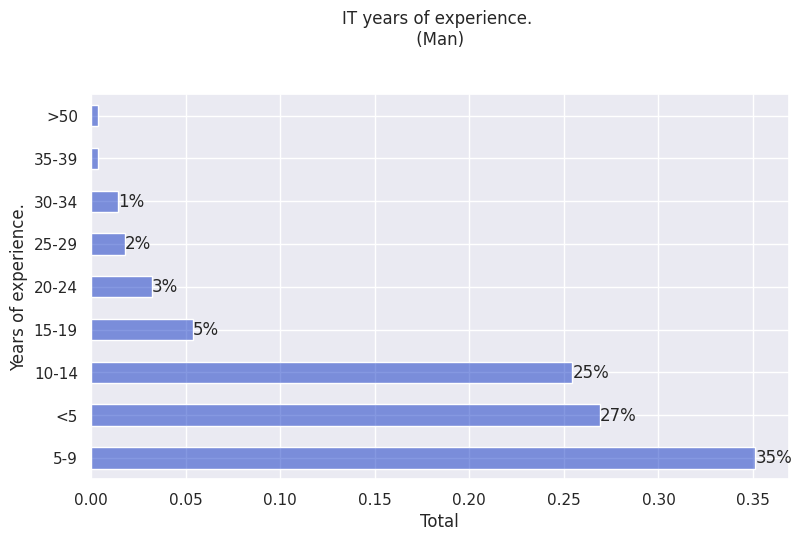

EXP EN IT HOMBRES ->  exp_en_IT
5-9      0.351254
<5       0.268817
10-14    0.254480
15-19    0.053763
20-24    0.032258
25-29    0.017921
30-34    0.014337
35-39    0.003584
>50      0.003584
Name: proportion, dtype: float64


In [560]:
fig = plt.figure(figsize=(9, 5))

homb_exp_ti = gen.get_group("MAN")["exp_en_IT"].value_counts(normalize=True)
homb_exp_ti_plot = homb_exp_ti.plot(
    kind="barh",
    title="IT years of experience. \n (Man) \n\n",
    color=get_color("Male", "light"),
    ylabel="Años de experiencia.",
    xlabel="Count",
)


homb_exp_ti_plot.set_xlabel("Total")
homb_exp_ti_plot.set_ylabel("Years of experience.")


for k, v in enumerate(
    gen.get_group("MAN")["exp_en_IT"].value_counts(normalize=True).values
):
    if v > 0.005:
        homb_exp_ti_plot.annotate(eh.get_percentage(v), (v, k), va="center")

plt.show()

print("EXP EN IT HOMBRES -> ", homb_exp_ti)

### EXPERIENCIA DE TI - WOMANES

In [561]:
gen.groups.keys()

dict_keys(['DONT SHARE', 'MAN', 'WOMAN'])

In [562]:
gen.get_group("WOMAN")["exp_en_IT"].value_counts()

exp_en_IT
5-9      23
<5       14
10-14     7
15-19     4
35-39     1
Name: count, dtype: int64

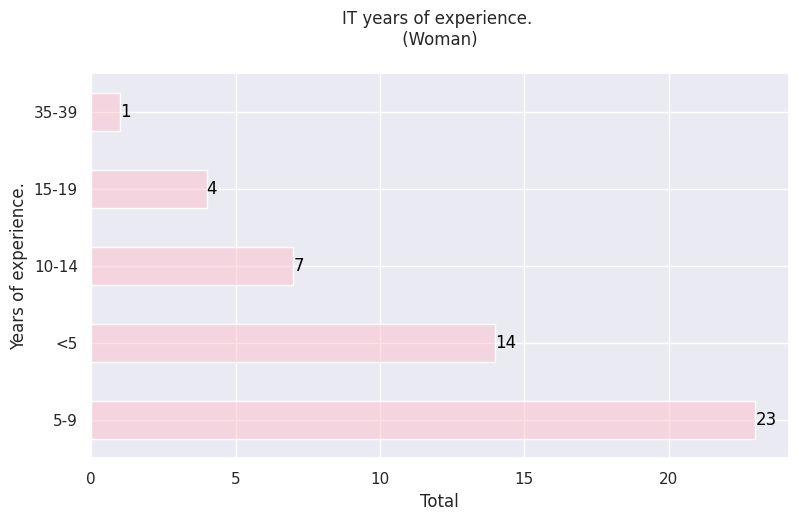

In [563]:
fig = plt.figure(figsize=(9, 5))

exp_ti_WOMAN = gen.get_group("WOMAN")["exp_en_IT"].value_counts()
exp_ti_WOMAN_plot = exp_ti_WOMAN.plot(
    kind="barh",
    title="IT years of experience. \n (Woman) \n",
    color=get_color("Female", "light"),
    ylabel="Years of experience.",
    xlabel="count",
)


exp_ti_WOMAN_plot.set_xlabel("Total")
exp_ti_WOMAN_plot.set_ylabel("Years of experience.")


for k, v in enumerate(gen.get_group("WOMAN")["exp_en_IT"].value_counts().values):
    exp_ti_WOMAN_plot.annotate(v, (v, k), va="center", color="black")

plt.show()

# Experiencia en TI - MANS VS WOMANES

In [564]:
male_df = gen.get_group("MAN")["exp_en_IT"].value_counts()
female_df = gen.get_group("WOMAN")["exp_en_IT"].value_counts()

male_years = [i for i in male_df.keys()]
female_years = [i for i in female_df.keys()]

for i in range(0, 4):
    female_years.append(0)

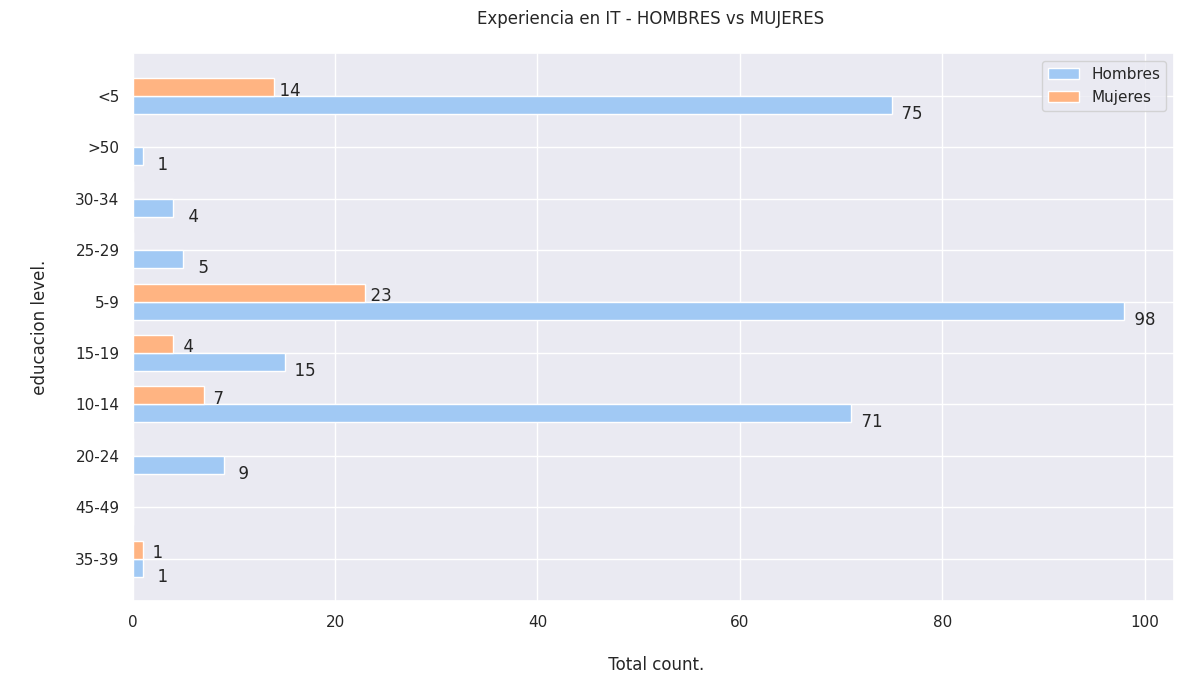

In [565]:
group_config = {
    "title": "Experiencia en IT - HOMBRES vs MUJERES \n",
    "c1_label": "Hombres",
    "c2_label": "Mujeres",
    "xlabel": "\n educacion level. \n",
    "ylabel": "\n Total count.",
}

eh.make_horizontal_grouped_chart(
    df,
    gen.get_group("MAN").fillna(""),
    gen.get_group("WOMAN").fillna(""),
    "exp_en_IT",
    eh.get_column_uniques(df, "exp_en_IT"),
    group_config,
)

### Experiencia en TI. - NO DEFINIDO

In [566]:
gen.get_group("DONT SHARE")["exp_en_IT"].value_counts()

exp_en_IT
<5       2
10-14    2
5-9      1
45-49    1
Name: count, dtype: int64

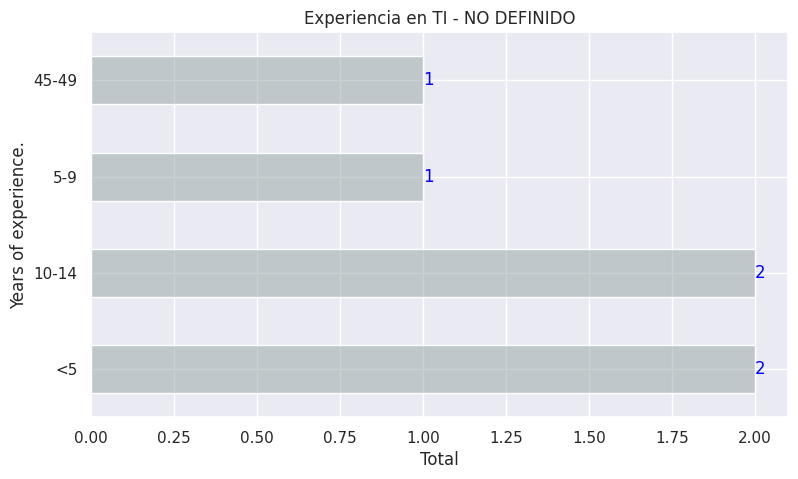

In [567]:
fig = plt.figure(figsize=(9, 5))


exp_ti_no_comp = (
    gen.get_group("DONT SHARE")["exp_en_IT"]
    .value_counts()
    .plot(
        kind="barh",
        title="Experiencia en TI - NO DEFINIDO",
        color=get_color("I do not share.", "light"),
        ylabel="Conteo.",
        xlabel="Años de experiencia",
    )
)

exp_ti_no_comp.set_xlabel("Total")
exp_ti_no_comp.set_ylabel("Years of experience.")


for k, v in enumerate(gen.get_group("DONT SHARE")["exp_en_IT"].value_counts().values):
    exp_ti_no_comp.annotate(v, (v, k), va="center", color="blue")

plt.show()

In [568]:
gen_exp_groups = df.groupby(["genero", "exp_en_IT"])

In [569]:
gen_exp_groups.groups.keys()

dict_keys([('DONT SHARE', '10-14'), ('DONT SHARE', '45-49'), ('DONT SHARE', '5-9'), ('DONT SHARE', '<5'), ('MAN', '10-14'), ('MAN', '15-19'), ('MAN', '20-24'), ('MAN', '25-29'), ('MAN', '30-34'), ('MAN', '35-39'), ('MAN', '5-9'), ('MAN', '<5'), ('MAN', '>50'), ('WOMAN', '10-14'), ('WOMAN', '15-19'), ('WOMAN', '35-39'), ('WOMAN', '5-9'), ('WOMAN', '<5'), (nan, '10-14'), (nan, '15-19'), (nan, '5-9'), (nan, '<5')])

In [570]:
len(gen_exp_groups.groups.keys())

22

<Figure size 900x500 with 0 Axes>

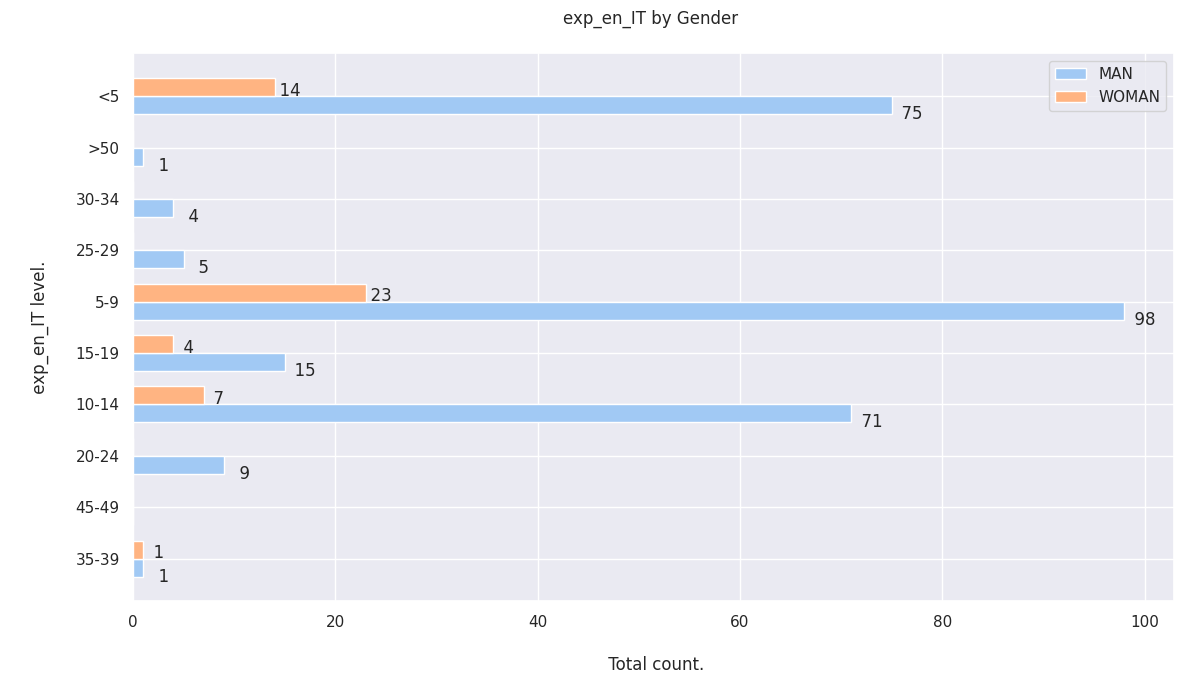

In [571]:
# Ploting a figure for this column.
fig = plt.figure(figsize=(9, 5))

group_config = {
    "title": "exp_en_IT by Gender \n",
    "c1_label": "MAN",
    "c2_label": "WOMAN",
    "xlabel": "\n exp_en_IT level. \n",
    "ylabel": "\n Total count.",
}

eh.make_horizontal_grouped_chart(
    df,
    gen.get_group("MAN").fillna(""),
    gen.get_group("WOMAN").fillna(""),
    "exp_en_IT",
    eh.get_column_uniques(df, "exp_en_IT"),
    group_config,
)

# Experiencia en codificacion - GENERAL

In [572]:
df["exp_en_programacion"].value_counts()

exp_en_programacion
5-9      125
<5       111
10-14     64
15-19     20
20-24      7
25-29      6
30-34      4
35-39      2
Name: count, dtype: int64

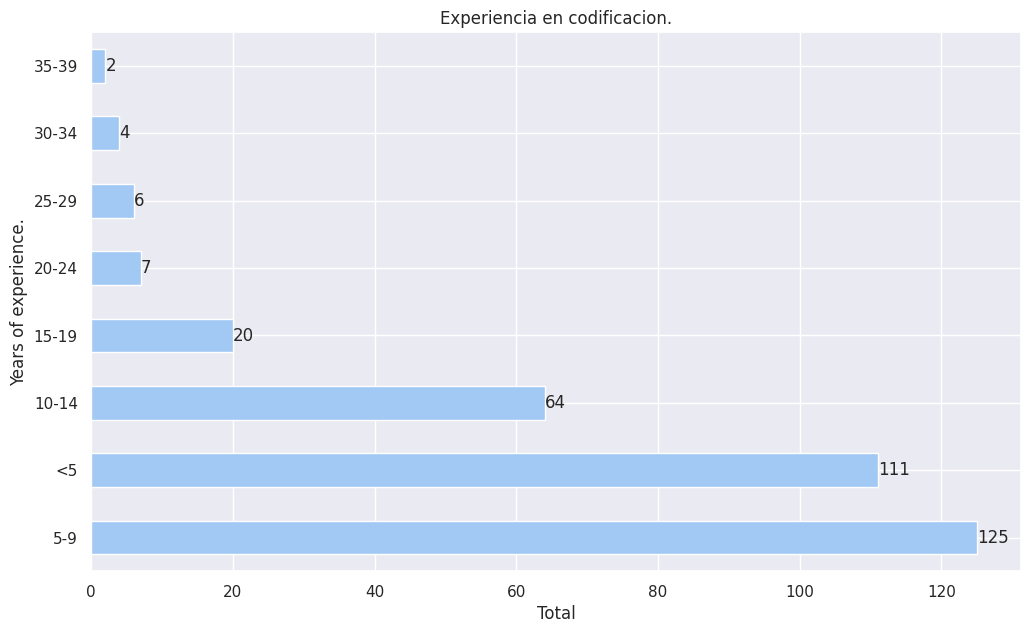

In [573]:
exp_df = df["exp_en_programacion"].value_counts()
exp_plot = exp_df.plot(
    kind="barh",
    title="Experiencia en codificacion.",
)

exp_plot.set_xlabel("Total")
exp_plot.set_ylabel("Years of experience.")


# Plot annotations.
for k, v in enumerate(exp_df):
    exp_plot.annotate(v, (v, k), va="center")

In [574]:
exp_df = df["exp_en_programacion"].value_counts(normalize=True)
print(exp_df)

exp_en_programacion
5-9      0.368732
<5       0.327434
10-14    0.188791
15-19    0.058997
20-24    0.020649
25-29    0.017699
30-34    0.011799
35-39    0.005900
Name: proportion, dtype: float64


In [575]:
for k, v in enumerate(exp_df.keys()):
    print(f"Experiencia : {v} | {eh.get_percentage(exp_df.values[k])}")

Experiencia : 5-9 | 37%
Experiencia : <5 | 33%
Experiencia : 10-14 | 19%
Experiencia : 15-19 | 6%
Experiencia : 20-24 | 2%
Experiencia : 25-29 | 2%
Experiencia : 30-34 | 1%
Experiencia : 35-39 | 1%


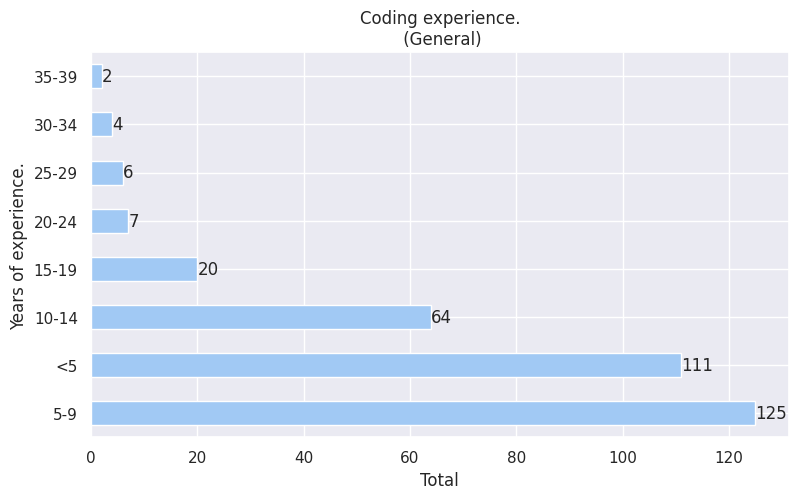

In [576]:
fig = plt.figure(figsize=(9, 5))


exp_coding = (
    df["exp_en_programacion"]
    .value_counts()
    .plot(kind="barh", title="Coding experience.\n (General)")
)

exp_coding.set_xlabel("Total")
exp_coding.set_ylabel("Years of experience.")


for k, v in enumerate(df["exp_en_programacion"].value_counts().values):
    exp_coding.annotate(v, (v, k), va="center")

plt.show()

### Experiencia en codificacion. - POR GENERO

#### EXPERIENCIA CODIFICANDO - MANS

In [577]:
gen.get_group("MAN")["exp_en_programacion"].value_counts()

exp_en_programacion
5-9      97
<5       90
10-14    57
15-19    16
20-24     7
25-29     6
30-34     4
35-39     1
Name: count, dtype: int64

In [578]:
gen.get_group("MAN")["exp_en_programacion"].value_counts(normalize=True)

exp_en_programacion
5-9      0.348921
<5       0.323741
10-14    0.205036
15-19    0.057554
20-24    0.025180
25-29    0.021583
30-34    0.014388
35-39    0.003597
Name: proportion, dtype: float64

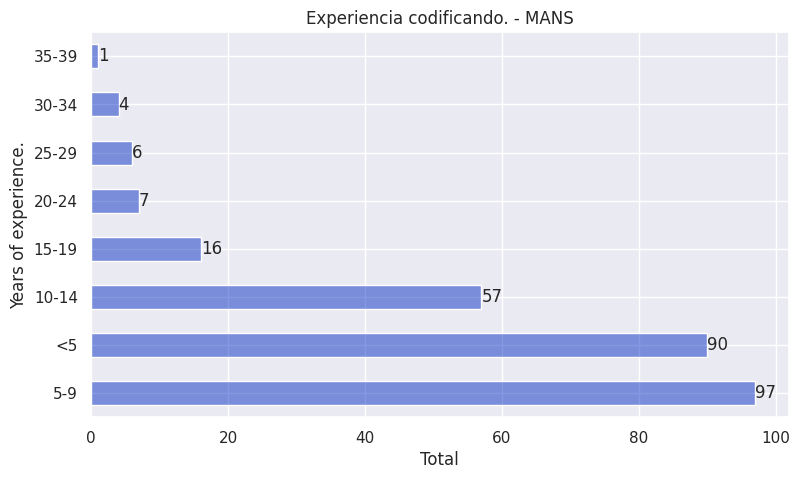

In [579]:
fig = plt.figure(figsize=(9, 5))

homb_exp_coding = (
    gen.get_group("MAN")["exp_en_programacion"]
    .value_counts()
    .plot(
        kind="barh",
        title="Experiencia codificando. - MANS",
        color=get_color("Male", "light"),
    )
)


homb_exp_coding.set_xlabel("Total")
homb_exp_coding.set_ylabel("Years of experience.")


for k, v in enumerate(
    gen.get_group("MAN")["exp_en_programacion"].value_counts().values
):
    homb_exp_coding.annotate(v, (v, k), va="center")

plt.show()

### EXPERIENCIA CODIFICANDO - WOMANES

In [580]:
gen.get_group("WOMAN")["exp_en_programacion"].value_counts()

exp_en_programacion
5-9      23
<5       17
10-14     5
15-19     2
35-39     1
Name: count, dtype: int64

In [581]:
gen.get_group("WOMAN")["exp_en_programacion"].value_counts(normalize=True)

exp_en_programacion
5-9      0.479167
<5       0.354167
10-14    0.104167
15-19    0.041667
35-39    0.020833
Name: proportion, dtype: float64

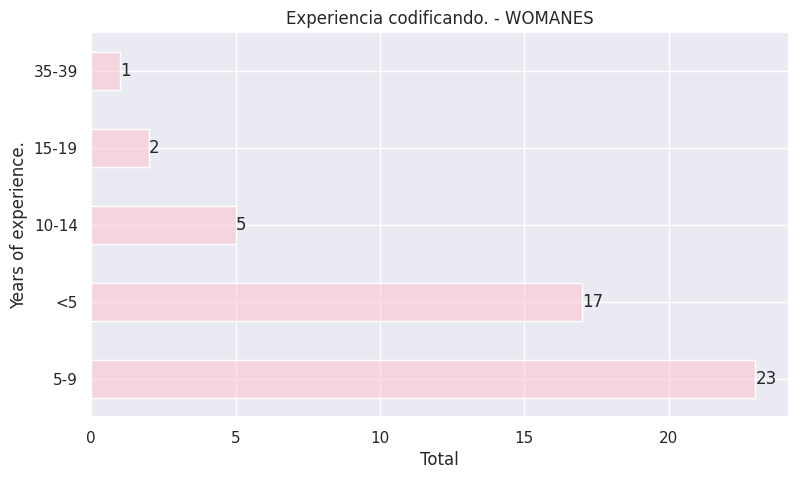

In [582]:
fig = plt.figure(figsize=(9, 5))

muj_exp_coding = (
    gen.get_group("WOMAN")["exp_en_programacion"]
    .value_counts()
    .plot(
        kind="barh",
        title="Experiencia codificando. - WOMANES",
        color=get_color("Female", "light"),
    )
)


muj_exp_coding.set_xlabel("Total")
muj_exp_coding.set_ylabel("Years of experience.")


for k, v in enumerate(
    gen.get_group("WOMAN")["exp_en_programacion"].value_counts().values
):
    muj_exp_coding.annotate(v, (v, k), va="center")

plt.show()

### EXPERIENCIA CODIFICANDO - DONT SHARE

In [583]:
gen.get_group("DONT SHARE")["exp_en_programacion"].value_counts()

exp_en_programacion
10-14    2
5-9      1
15-19    1
<5       1
Name: count, dtype: int64

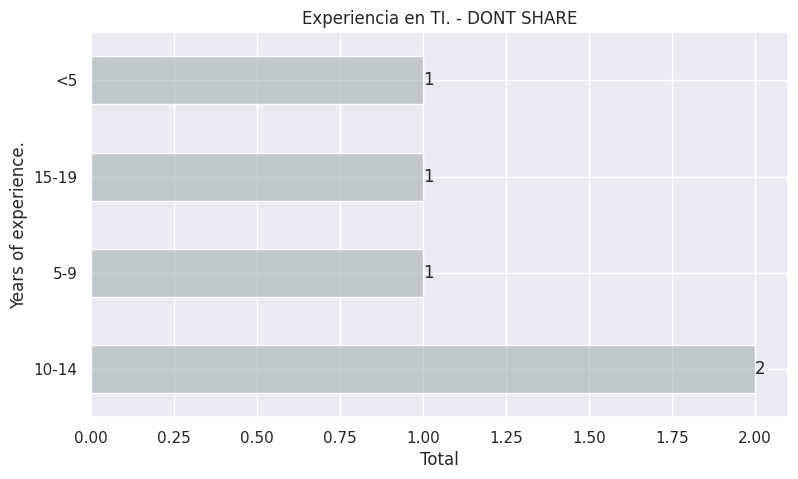

In [584]:
fig = plt.figure(figsize=(9, 5))


no_comp_exp_coding = (
    gen.get_group("DONT SHARE")["exp_en_programacion"]
    .value_counts()
    .plot(
        kind="barh",
        title="Experiencia en TI. - DONT SHARE",
        color=get_color("I do not share.", "light"),
    )
)


no_comp_exp_coding.set_xlabel("Total")
no_comp_exp_coding.set_ylabel("Years of experience.")


for k, v in enumerate(
    gen.get_group("DONT SHARE")["exp_en_programacion"].value_counts().values
):
    no_comp_exp_coding.annotate(v, (v, k), va="center")

plt.show()

<Figure size 900x500 with 0 Axes>

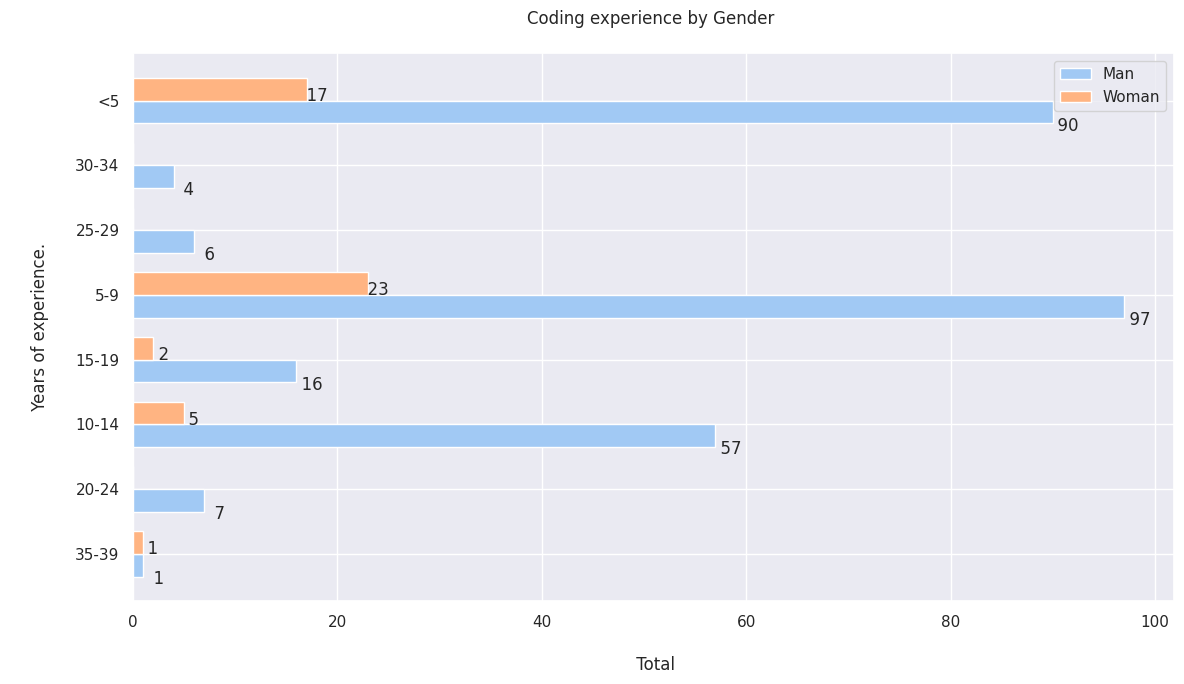

In [585]:
# Ploting a figure for this column.
fig = plt.figure(figsize=(9, 5))

group_config = {
    "title": "Coding experience by Gender \n",
    "c1_label": "Man",
    "c2_label": "Woman",
    "xlabel": "\n Years of experience. \n",
    "ylabel": "\n Total",
}

eh.make_horizontal_grouped_chart(
    df,
    gen.get_group("MAN").fillna(""),
    gen.get_group("WOMAN").fillna(""),
    "exp_en_programacion",
    eh.get_column_uniques(df, "exp_en_programacion"),
    group_config,
)

# Primera linea de codigo en maquina. - GENERAL

In [586]:
df["1_linea_de_codigo"].value_counts()

1_linea_de_codigo
<10      101
10-11     55
14-15     51
12-13     37
16-17     31
18-19     27
20-21     16
>30        6
22-23      4
26-27      4
24-25      3
28-29      3
Name: count, dtype: int64

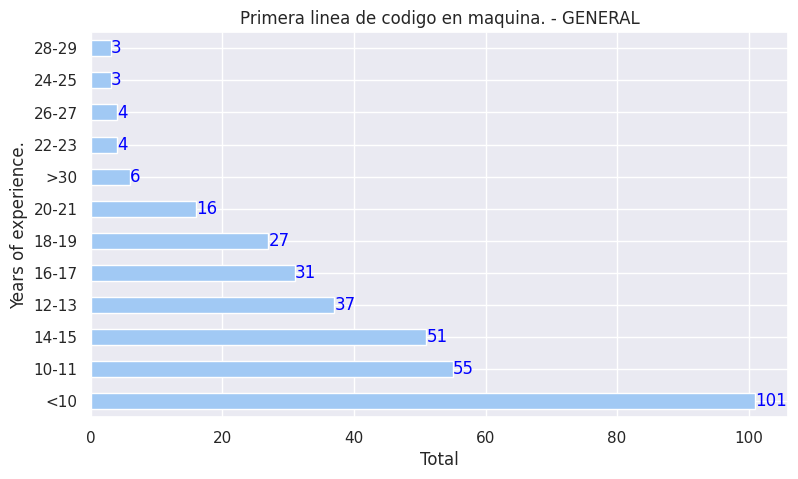

In [587]:
fig = plt.figure(figsize=(9, 5))

prim_linea_coding = (
    df["1_linea_de_codigo"]
    .value_counts()
    .plot(kind="barh", title="Primera linea de codigo en maquina. - GENERAL")
)

prim_linea_coding.set_xlabel("Total")
prim_linea_coding.set_ylabel("Years of experience.")


for k, v in enumerate(df["1_linea_de_codigo"].value_counts().values):
    prim_linea_coding.annotate(v, (v, k), va="center", color="blue")

plt.show()

# PRIMERA LINEA DE CODIGO EN MAQUINA - POR GENERO


### PRIMERA LINEA EN MAQUINA - SOLO MANS

In [588]:
gen.get_group("MAN")["1_linea_de_codigo"].value_counts()

1_linea_de_codigo
<10      86
10-11    45
14-15    38
16-17    29
12-13    29
18-19    22
20-21    11
>30       5
26-27     4
24-25     3
22-23     3
28-29     2
Name: count, dtype: int64

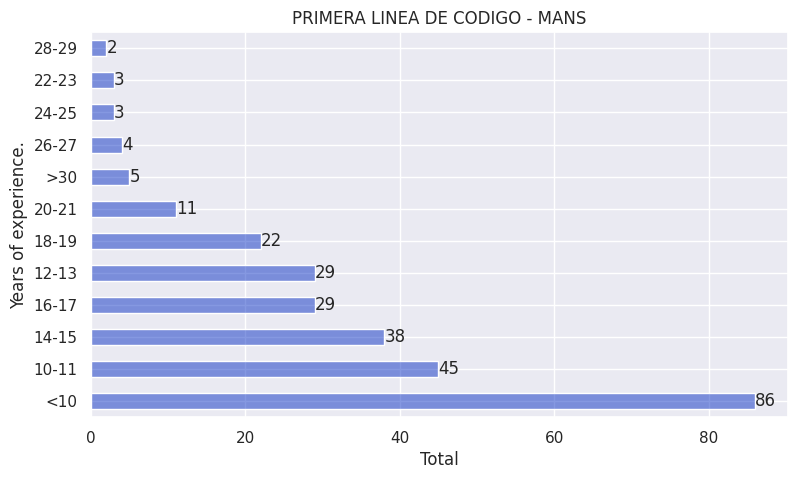

In [589]:
fig = plt.figure(figsize=(9, 5))

prim_linea_coding_MANs = (
    gen.get_group("MAN")["1_linea_de_codigo"]
    .value_counts()
    .plot(
        kind="barh",
        title="PRIMERA LINEA DE CODIGO - MANS",
        color=get_color("Male", "light"),
    )
)


prim_linea_coding_MANs.set_xlabel("Total")
prim_linea_coding_MANs.set_ylabel("Years of experience.")


for k, v in enumerate(gen.get_group("MAN")["1_linea_de_codigo"].value_counts().values):
    prim_linea_coding_MANs.annotate(v, (v, k), va="center")

plt.show()

### PRIMERA LINEA EN MAQUINA - WOMANES

In [590]:
gen.get_group("WOMAN")["1_linea_de_codigo"].value_counts()

1_linea_de_codigo
<10      13
14-15    12
12-13     7
10-11     6
18-19     4
20-21     2
16-17     1
28-29     1
>30       1
Name: count, dtype: int64

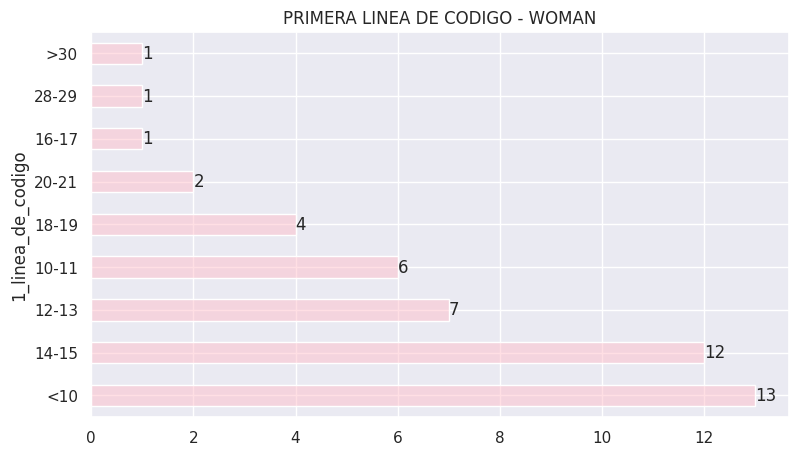

In [591]:
fig = plt.figure(figsize=(9, 5))

prim_linea_coding_WOMANes = (
    gen.get_group("WOMAN")["1_linea_de_codigo"]
    .value_counts()
    .plot(
        kind="barh",
        title="PRIMERA LINEA DE CODIGO - WOMAN",
        color=get_color("Female", "light"),
    )
)

for k, v in enumerate(
    gen.get_group("WOMAN")["1_linea_de_codigo"].value_counts().values
):
    prim_linea_coding_WOMANes.annotate(v, (v, k), va="center")

plt.show()

# PRIMERA LINEA EN MAQUINA - NO DEFINIDO

In [592]:
gen.get_group("DONT SHARE")["1_linea_de_codigo"].value_counts()

1_linea_de_codigo
10-11    2
22-23    1
18-19    1
14-15    1
20-21    1
Name: count, dtype: int64

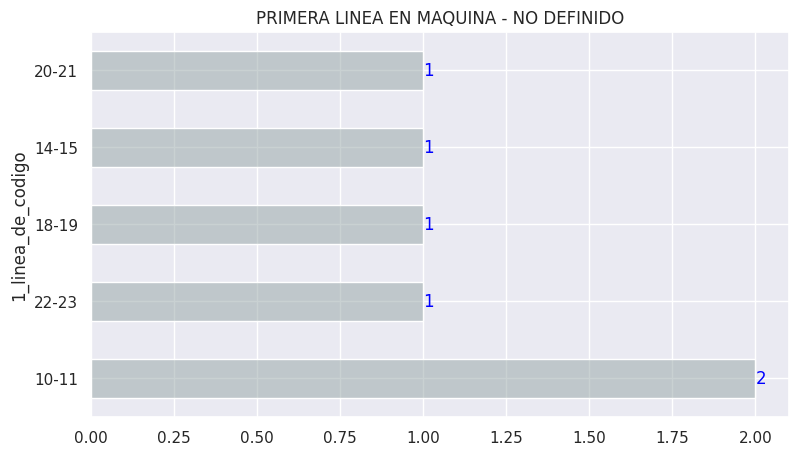

In [593]:
fig = plt.figure(figsize=(9, 5))

prim_linea_cod_no_comp = (
    gen.get_group("DONT SHARE")["1_linea_de_codigo"]
    .value_counts()
    .plot(
        kind="barh",
        title="PRIMERA LINEA EN MAQUINA - NO DEFINIDO",
        color=get_color("I do not share.", "light"),
    )
)


for k, v in enumerate(
    gen.get_group("DONT SHARE")["1_linea_de_codigo"].value_counts().values
):
    prim_linea_cod_no_comp.annotate(v, (v, k), va="center", color="blue")

plt.show()

<Figure size 900x500 with 0 Axes>

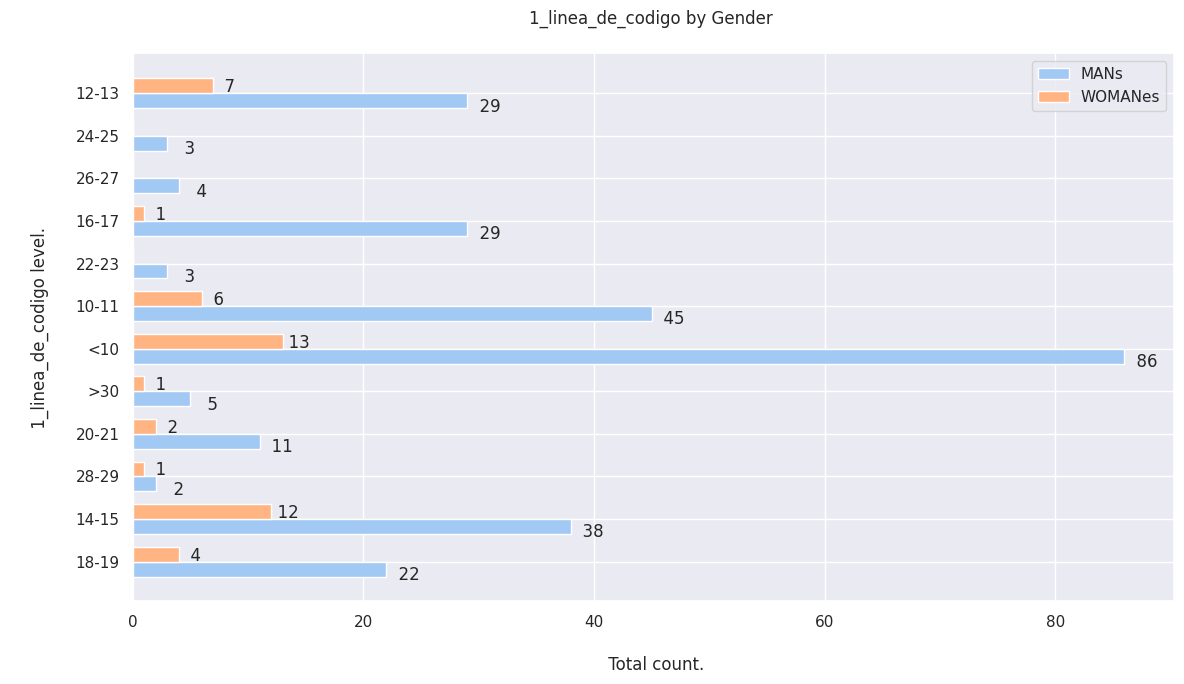

In [594]:
# Ploting a figure for this column.
fig = plt.figure(figsize=(9, 5))

group_config = {
    "title": "1_linea_de_codigo by Gender \n",
    "c1_label": "MANs",
    "c2_label": "WOMANes",
    "xlabel": "\n 1_linea_de_codigo level. \n",
    "ylabel": "\n Total count.",
}

eh.make_horizontal_grouped_chart(
    df,
    gen.get_group("MAN").fillna(""),
    gen.get_group("WOMAN").fillna(""),
    "1_linea_de_codigo",
    eh.get_column_uniques(df, "1_linea_de_codigo"),
    group_config,
)

In [595]:
gen.groups.keys()

dict_keys(['DONT SHARE', 'MAN', 'WOMAN'])

# GENERAL

### EXPERIENCIA VS MODALIDAD

- Se pretende explorar el tipo de trabajo que realizan segun la experiencia en TI.

In [596]:
exp = df.groupby("exp_en_IT")

In [597]:
exp_cats = [i for i in exp.groups.keys()]

In [598]:
for k, v in enumerate(exp_cats):
    mod = exp.get_group(v)["modalidad"].value_counts(normalize=True)
    title = "{0} AÑOS DE EXPERIENCIA - MODALIDAD".format(v)

    print("=" * 35)
    print(title)
    print(mod)
    print("=" * 35)

10-14 AÑOS DE EXPERIENCIA - MODALIDAD
modalidad
Remoto        0.426829
Hibrído       0.353659
Presencial    0.219512
Name: proportion, dtype: float64
15-19 AÑOS DE EXPERIENCIA - MODALIDAD
modalidad
Remoto        0.50
Hibrído       0.40
Ninguna       0.05
Presencial    0.05
Name: proportion, dtype: float64
20-24 AÑOS DE EXPERIENCIA - MODALIDAD
modalidad
Hibrído    0.555556
Remoto     0.444444
Name: proportion, dtype: float64
25-29 AÑOS DE EXPERIENCIA - MODALIDAD
modalidad
Hibrído       0.6
Presencial    0.4
Name: proportion, dtype: float64
30-34 AÑOS DE EXPERIENCIA - MODALIDAD
modalidad
Remoto    1.0
Name: proportion, dtype: float64
35-39 AÑOS DE EXPERIENCIA - MODALIDAD
modalidad
Remoto        0.5
Presencial    0.5
Name: proportion, dtype: float64
45-49 AÑOS DE EXPERIENCIA - MODALIDAD
modalidad
Ninguna    1.0
Name: proportion, dtype: float64
5-9 AÑOS DE EXPERIENCIA - MODALIDAD
modalidad
Remoto        0.419355
Hibrído       0.306452
Presencial    0.266129
Ninguna       0.008065
Name: pro

In [599]:
for k, v in enumerate(exp_cats):
    mod = exp.get_group(v)["modalidad"].value_counts(normalize=True)

    print("{0} AÑOS DE EXPERIENCIA - MODALIDAD".format(v))
    print("=" * 39)
    print(mod)
    print("\n" * 3)

10-14 AÑOS DE EXPERIENCIA - MODALIDAD
modalidad
Remoto        0.426829
Hibrído       0.353659
Presencial    0.219512
Name: proportion, dtype: float64




15-19 AÑOS DE EXPERIENCIA - MODALIDAD
modalidad
Remoto        0.50
Hibrído       0.40
Ninguna       0.05
Presencial    0.05
Name: proportion, dtype: float64




20-24 AÑOS DE EXPERIENCIA - MODALIDAD
modalidad
Hibrído    0.555556
Remoto     0.444444
Name: proportion, dtype: float64




25-29 AÑOS DE EXPERIENCIA - MODALIDAD
modalidad
Hibrído       0.6
Presencial    0.4
Name: proportion, dtype: float64




30-34 AÑOS DE EXPERIENCIA - MODALIDAD
modalidad
Remoto    1.0
Name: proportion, dtype: float64




35-39 AÑOS DE EXPERIENCIA - MODALIDAD
modalidad
Remoto        0.5
Presencial    0.5
Name: proportion, dtype: float64




45-49 AÑOS DE EXPERIENCIA - MODALIDAD
modalidad
Ninguna    1.0
Name: proportion, dtype: float64




5-9 AÑOS DE EXPERIENCIA - MODALIDAD
modalidad
Remoto        0.419355
Hibrído       0.306452
Presencial    0.266129
Ning

In [600]:
for k, v in enumerate(exp_cats):
    mod = exp.get_group(v)["modalidad"].value_counts(normalize=True)

    print("{0} AÑOS DE EXPERIENCIA - MODALIDAD".format(v))
    print("=" * 39)
    print(eh.percentage_to_normal(mod))
    print("\n" * 3)

10-14 AÑOS DE EXPERIENCIA - MODALIDAD
modalidad
Remoto        42.7 %
Hibrído       35.4 %
Presencial    22.0 %
Name: proportion, dtype: object




15-19 AÑOS DE EXPERIENCIA - MODALIDAD
modalidad
Remoto        50.0 %
Hibrído       40.0 %
Ninguna        5.0 %
Presencial     5.0 %
Name: proportion, dtype: object




20-24 AÑOS DE EXPERIENCIA - MODALIDAD
modalidad
Hibrído    55.6 %
Remoto     44.4 %
Name: proportion, dtype: object




25-29 AÑOS DE EXPERIENCIA - MODALIDAD
modalidad
Hibrído       60.0 %
Presencial    40.0 %
Name: proportion, dtype: object




30-34 AÑOS DE EXPERIENCIA - MODALIDAD
modalidad
Remoto    100.0 %
Name: proportion, dtype: object




35-39 AÑOS DE EXPERIENCIA - MODALIDAD
modalidad
Remoto        50.0 %
Presencial    50.0 %
Name: proportion, dtype: object




45-49 AÑOS DE EXPERIENCIA - MODALIDAD
modalidad
Ninguna    100.0 %
Name: proportion, dtype: object




5-9 AÑOS DE EXPERIENCIA - MODALIDAD
modalidad
Remoto        41.9 %
Hibrído       30.6 %
Presencial    26.6 %

In [601]:
exp.groups.keys()

dict_keys(['10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '45-49', '5-9', '<5', '>50'])

In [602]:
d = exp.get_group("10-14")["modalidad"].value_counts(normalize=True)
print(d)

modalidad
Remoto        0.426829
Hibrído       0.353659
Presencial    0.219512
Name: proportion, dtype: float64


In [603]:
print("=" * 33)
print(eh.percentage_to_normal(d))
print("\n" * 4)

modalidad
Remoto        42.7 %
Hibrído       35.4 %
Presencial    22.0 %
Name: proportion, dtype: object







In [604]:
for k, v in enumerate(exp_cats):
    d = exp.get_group(v)["modalidad"].value_counts(normalize=True)
    print("_" * 34)
    print(f"Años de experiencia:{v}")
    print("_" * 34)
    print(d)
    print("\n" * 3)

__________________________________
Años de experiencia:10-14
__________________________________
modalidad
Remoto        0.426829
Hibrído       0.353659
Presencial    0.219512
Name: proportion, dtype: float64




__________________________________
Años de experiencia:15-19
__________________________________
modalidad
Remoto        0.50
Hibrído       0.40
Ninguna       0.05
Presencial    0.05
Name: proportion, dtype: float64




__________________________________
Años de experiencia:20-24
__________________________________
modalidad
Hibrído    0.555556
Remoto     0.444444
Name: proportion, dtype: float64




__________________________________
Años de experiencia:25-29
__________________________________
modalidad
Hibrído       0.6
Presencial    0.4
Name: proportion, dtype: float64




__________________________________
Años de experiencia:30-34
__________________________________
modalidad
Remoto    1.0
Name: proportion, dtype: float64




__________________________________
Años de experie

### EXPERIENCIA EN TI  VS IMPORTANCIA DE LA EDUCACION FORMAL
    - Postura sobre la "importancia de la educacion formal" de los que respondieron la
    encuesta segun los años de experiencia en TI.

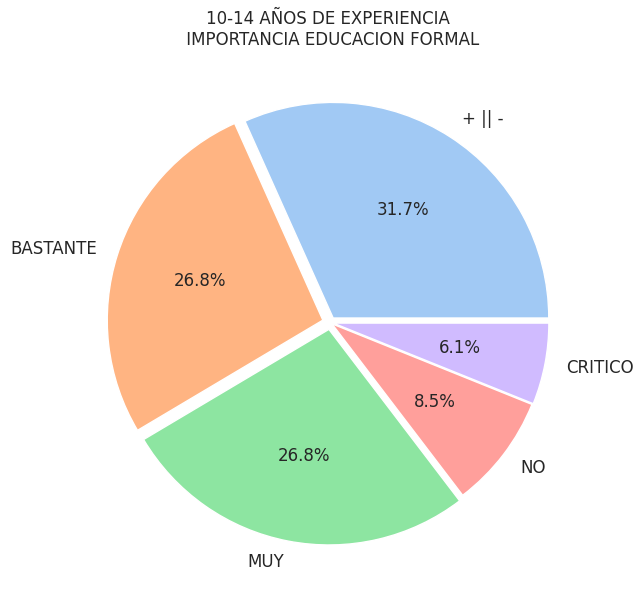

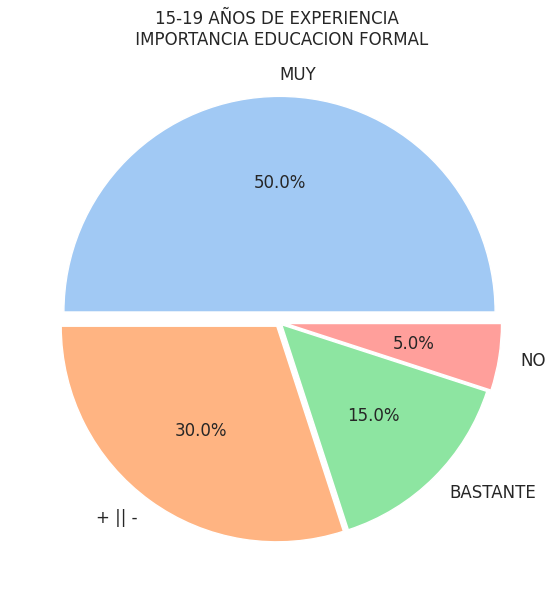

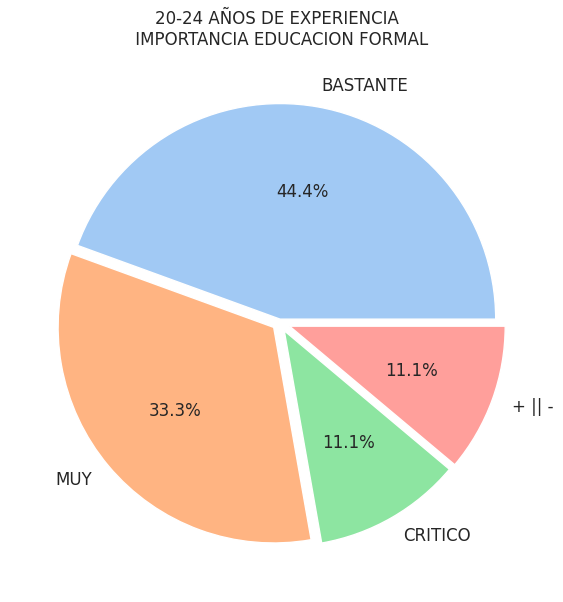

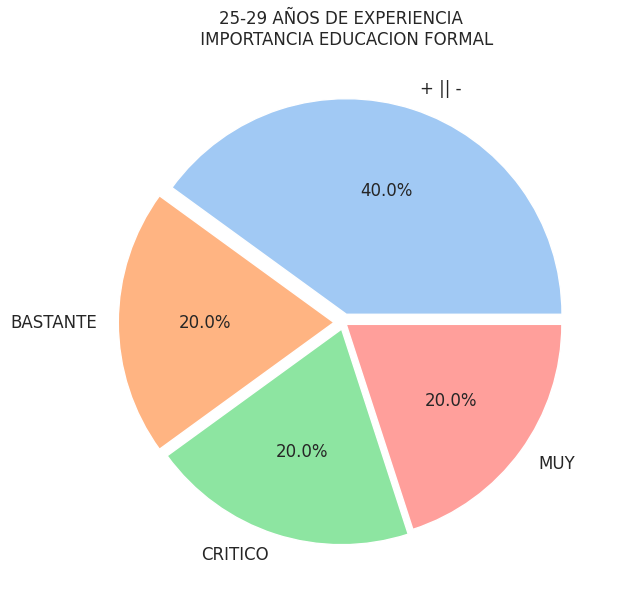

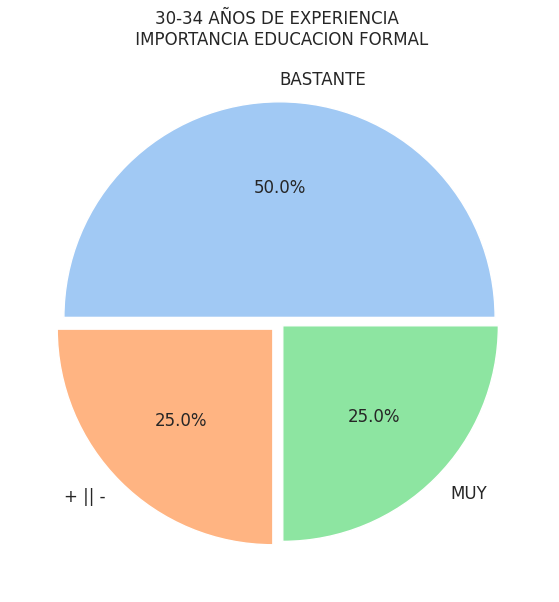

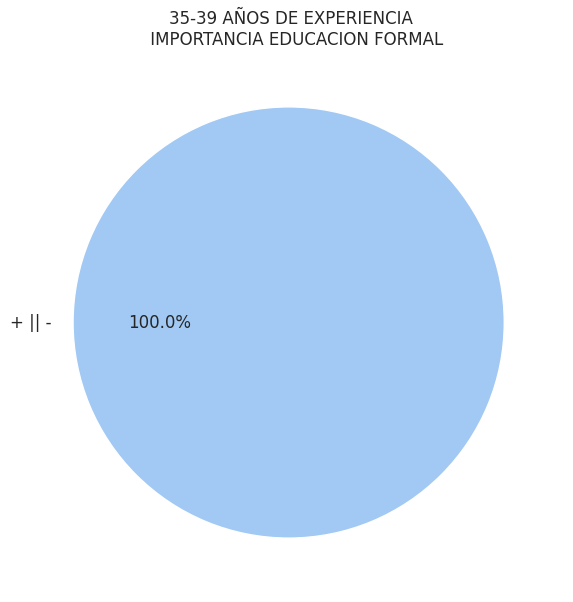

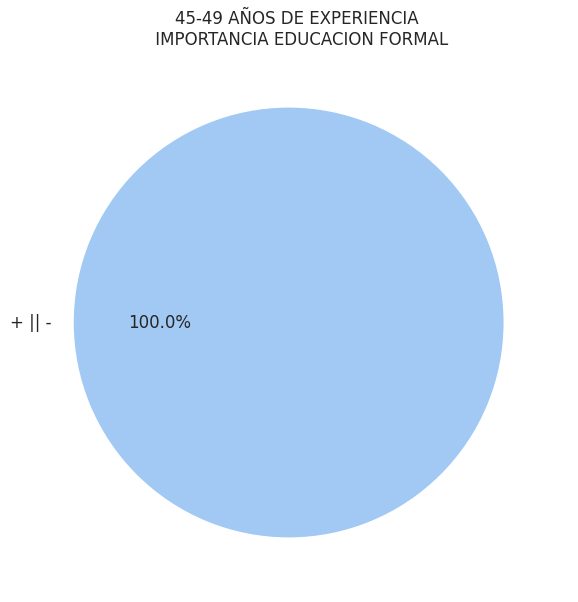

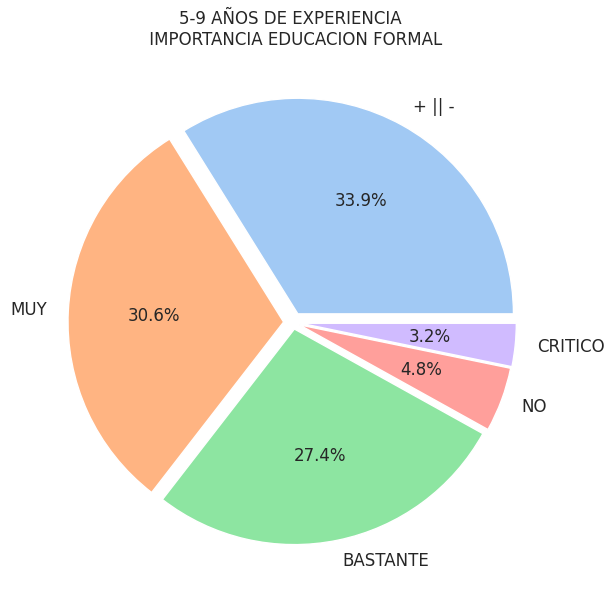

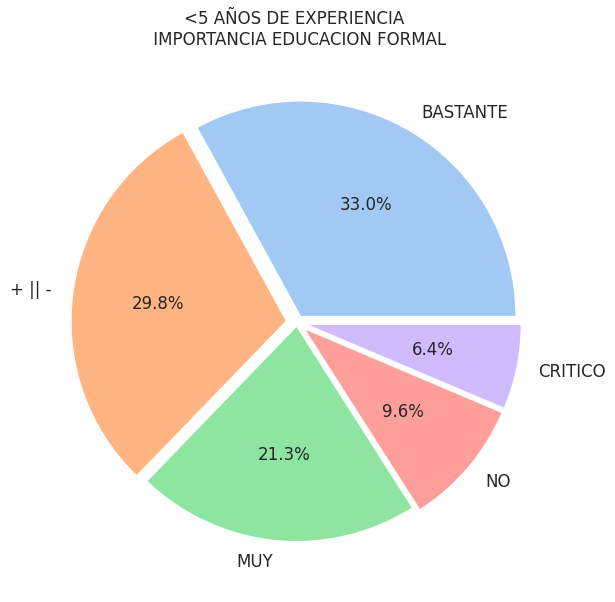

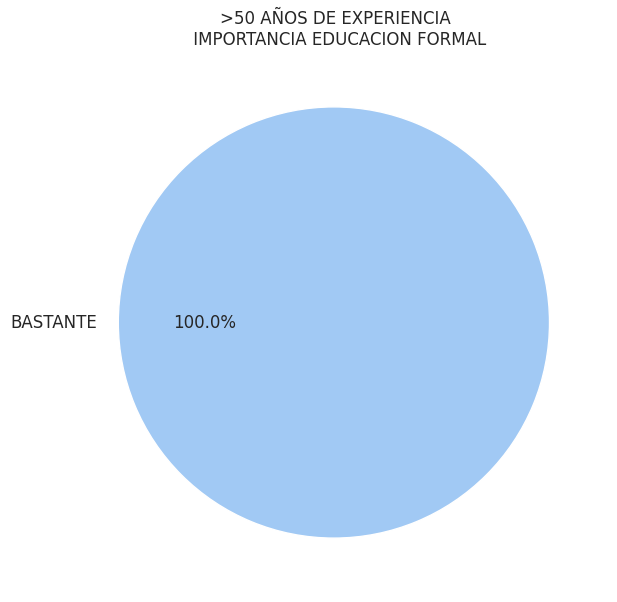

In [605]:
# plt.figure(figsize=(10, 60), dpi=80)


for k, v in enumerate(exp_cats):
    # plt.subplot(18, 2, k + 1)
    imp_df = exp.get_group(v)["imp_ed_formal"].value_counts(normalize=True)
    imp_plot = imp_df.plot(
        kind="pie",
        title="{0} AÑOS DE EXPERIENCIA \n IMPORTANCIA EDUCACION FORMAL".format(v),
        ylabel="",
        autopct="%1.1f%%",
        textprops={"fontsize": 12},
        explode=eh.explode_pie(imp_df.size),
    )

    plt.show()

    # for l, m in enumerate(exp.get_group(v)["imp_ed_formal"].value_counts().values):
    #   imp.annotate(m, (m, l), va="center", color="blue")


# plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=1)

### EXPERIENCIA EN TI VS LENGUAJE FAVORITO
  - Se explora la relacion entre los años de experiencia en TI vs el lenguaje favorito.

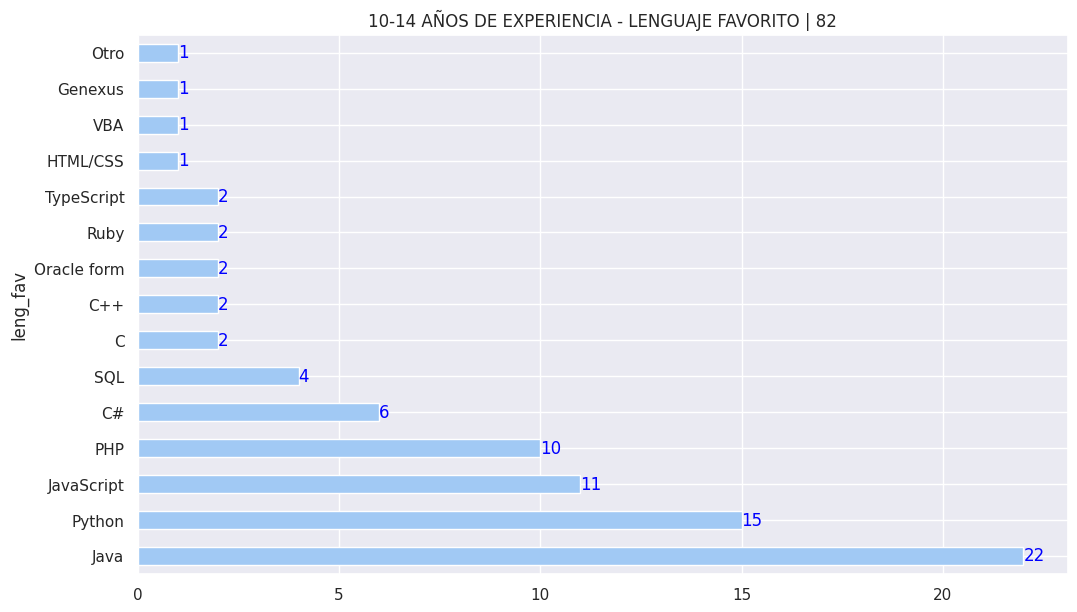

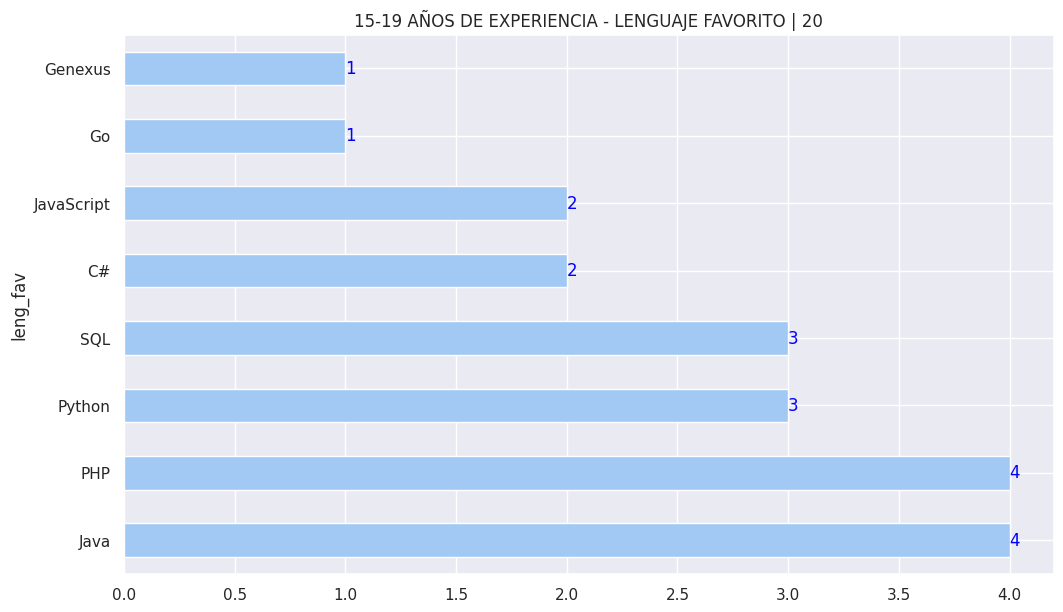

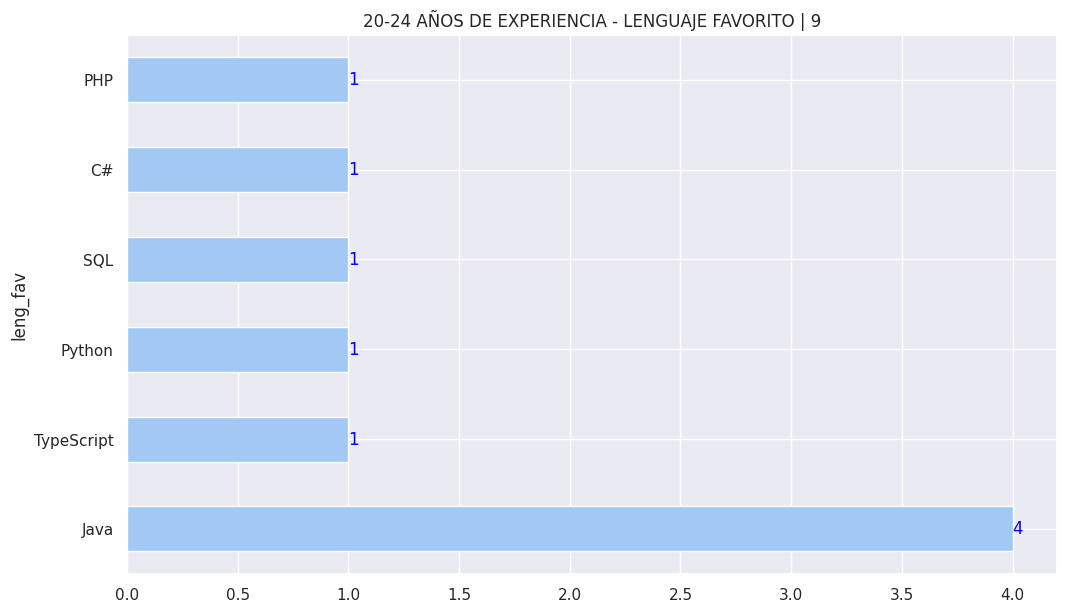

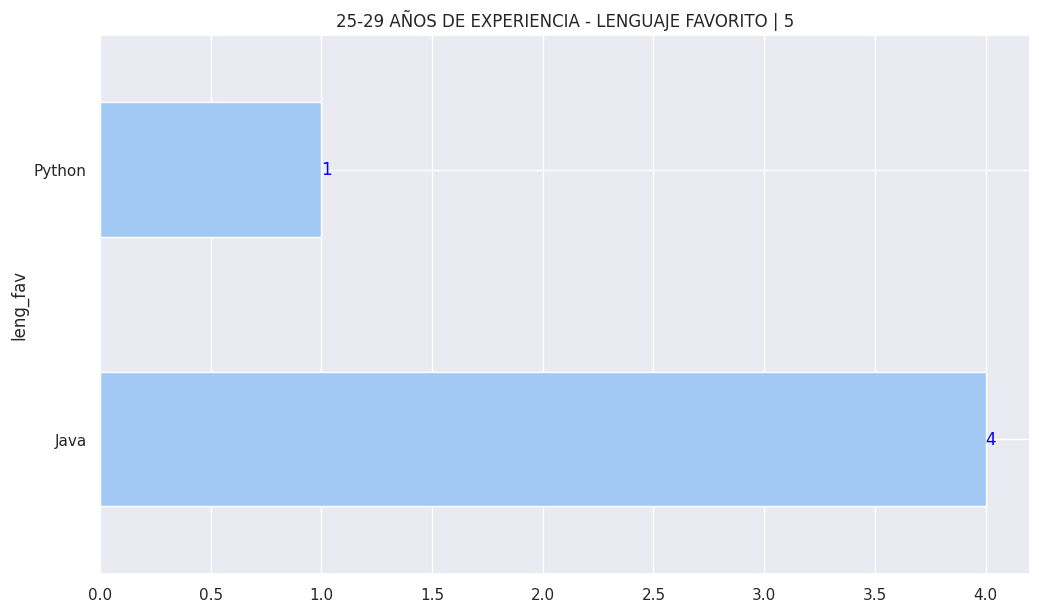

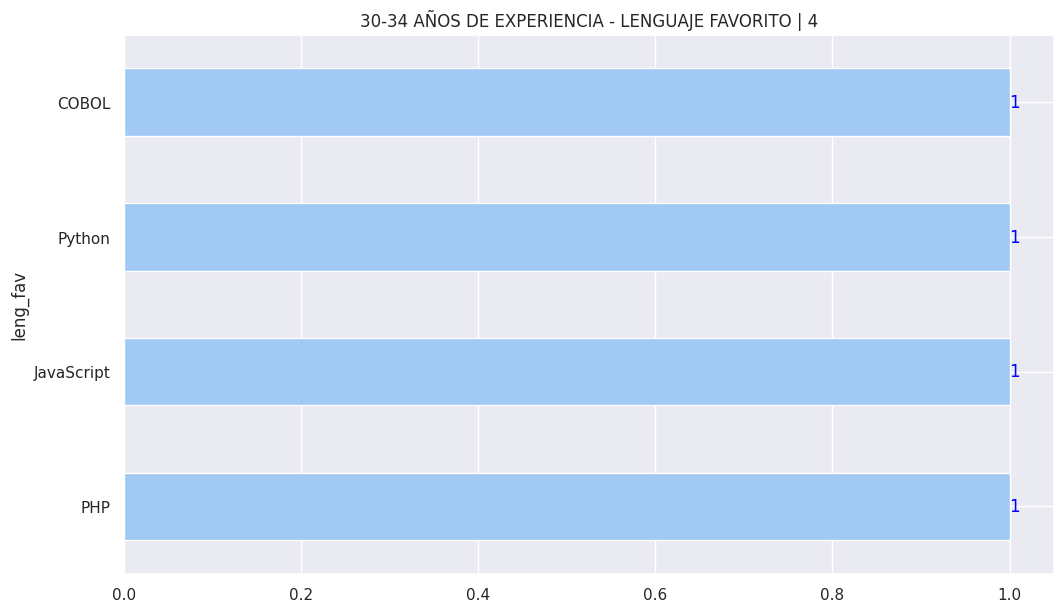

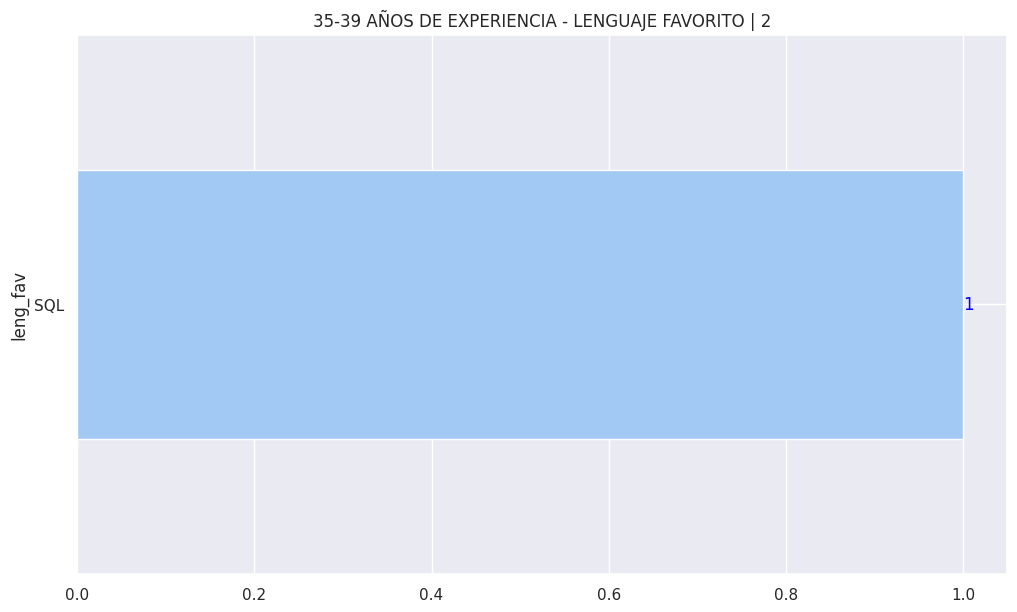

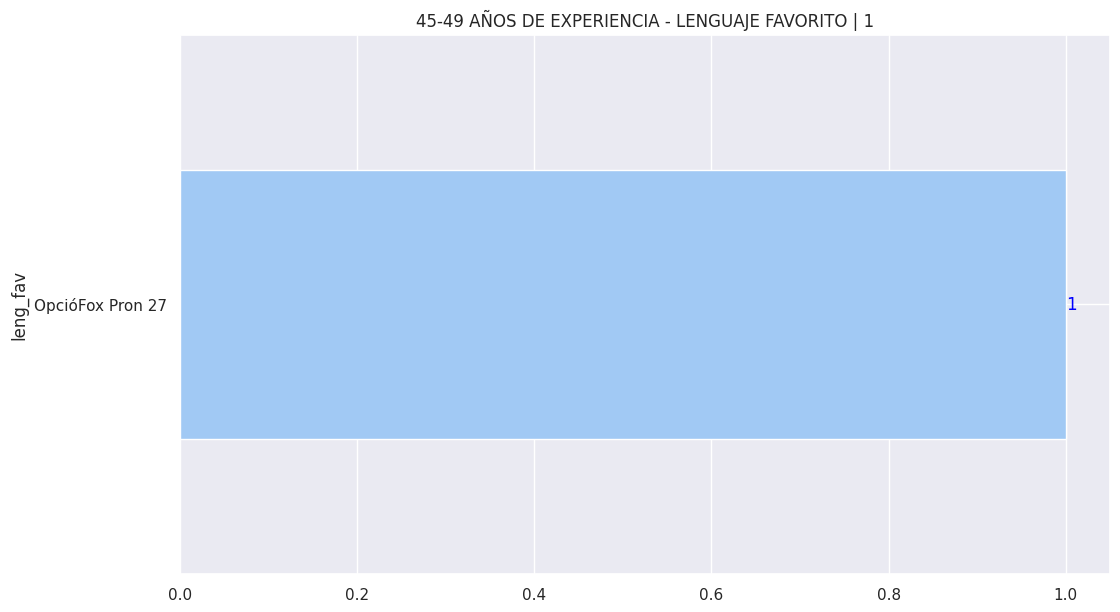

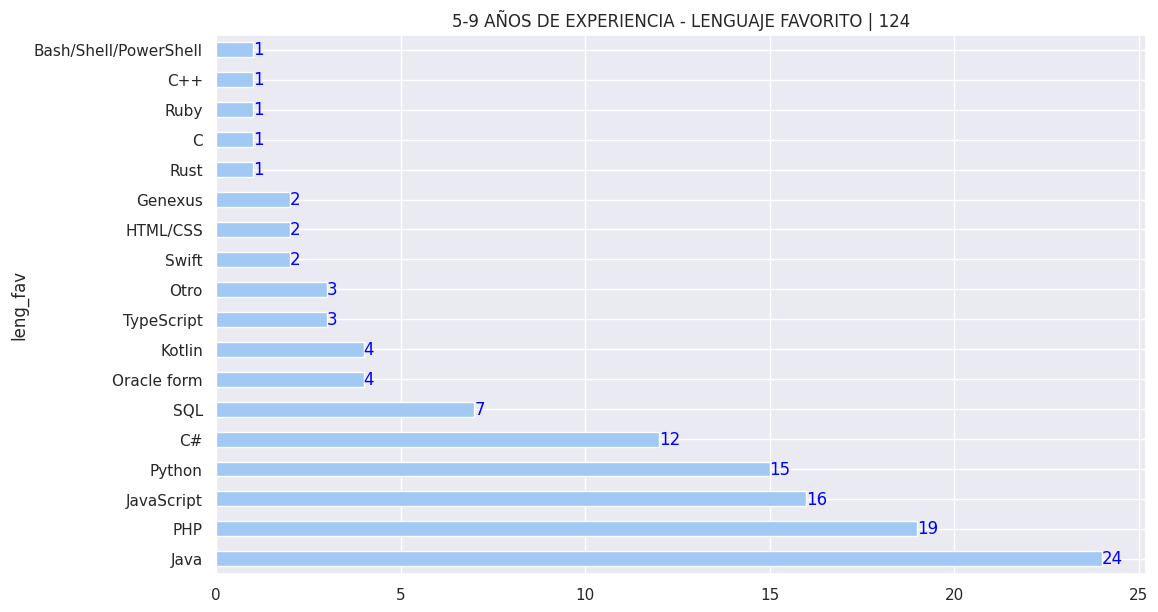

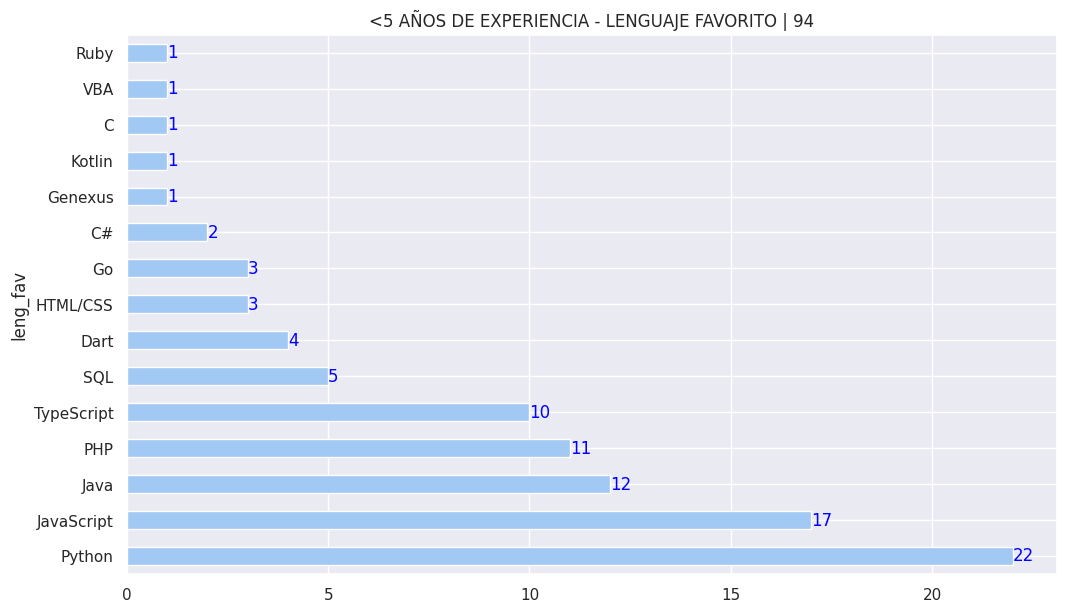

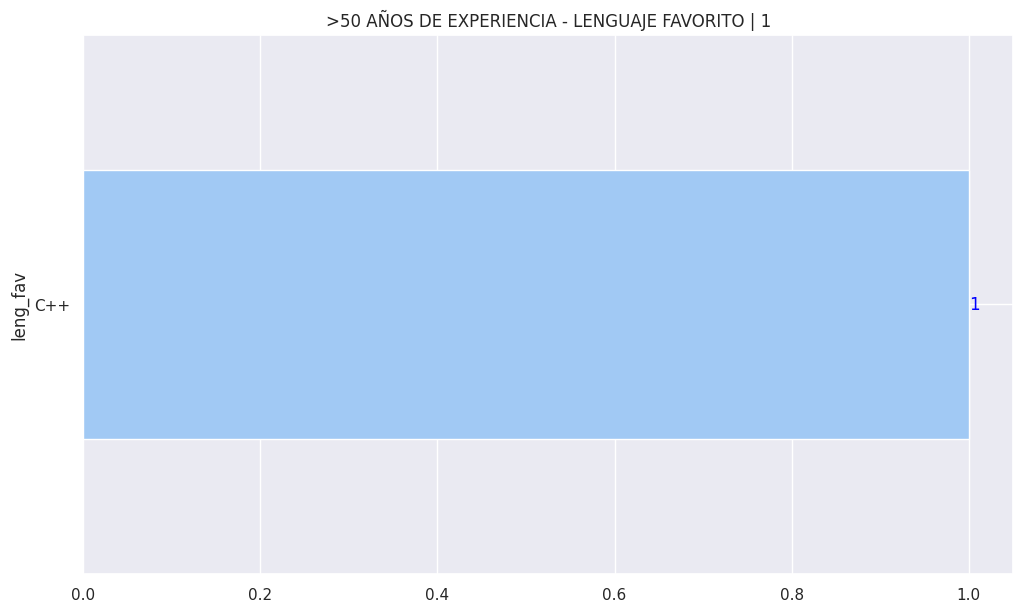

In [622]:
# plt.figure(figsize=(10, 90), dpi=80)


for k, v in enumerate(exp_cats):
    # plt.subplot(18, 1, k + 1)
    leng = (
        exp.get_group(v)["leng_fav"]
        .value_counts()
        .plot(
            kind="barh",
            title="{0} AÑOS DE EXPERIENCIA - LENGUAJE FAVORITO | {1}".format(
                v, exp.get_group(v)["leng_fav"].shape[0]
            ),
        )
    )

    for l, m in enumerate(exp.get_group(v)["leng_fav"].value_counts().values):
        leng.annotate(m, (m, l), va="center", color="blue")

    plt.show()
    print("\n" * 3)


# plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

### EXPERIENCIA EN TI VS ORIGEN DEL TRABAJO
  - Se explora la experiencia en TI vs el origen del trabajo que realiza el encuestado.

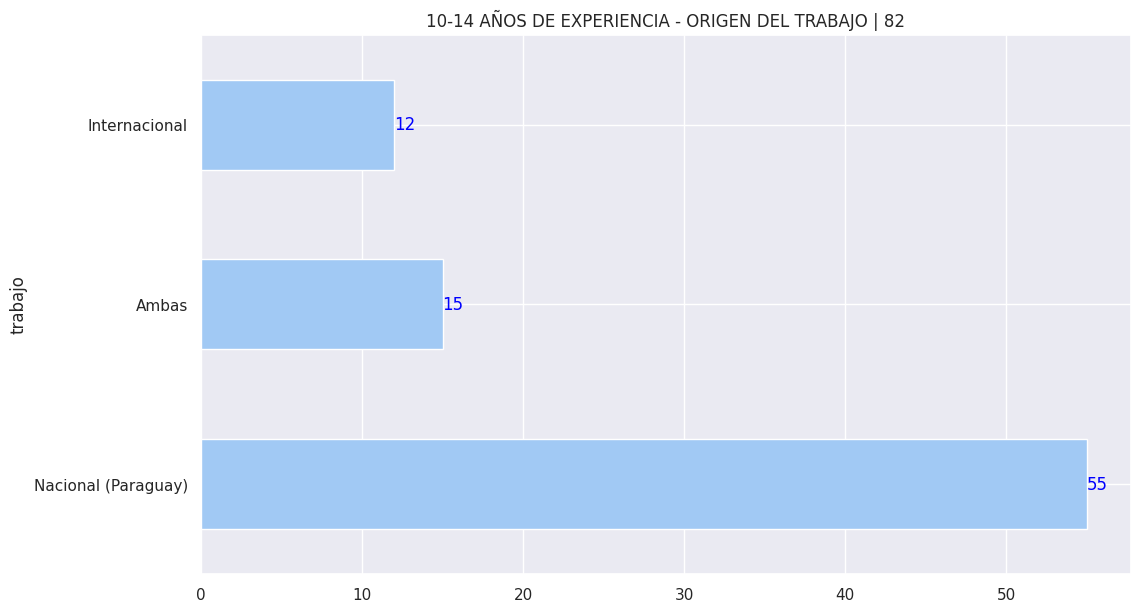

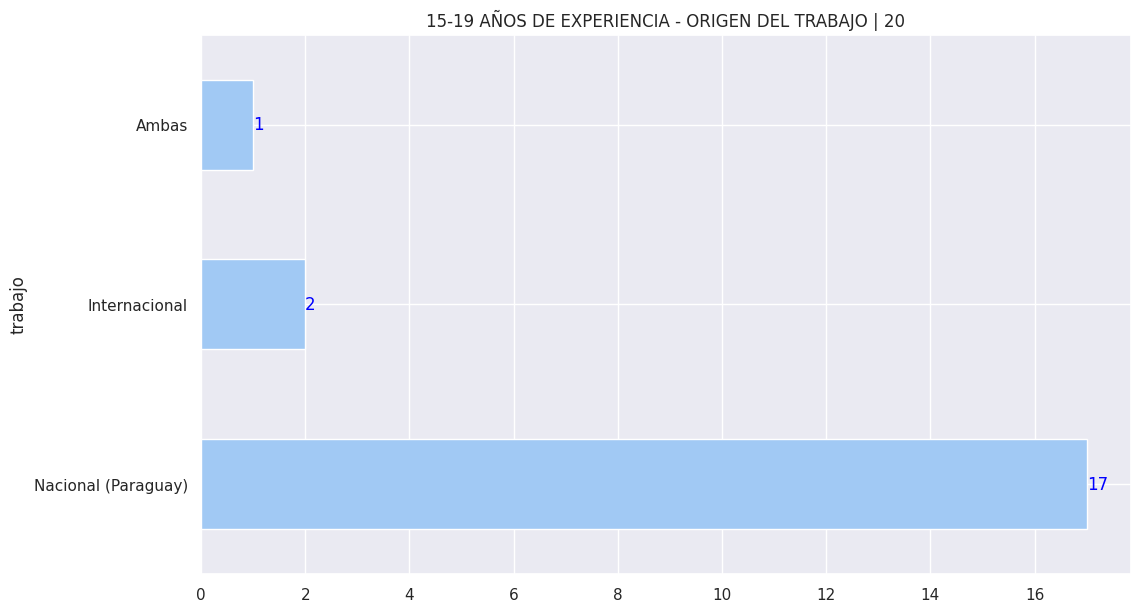

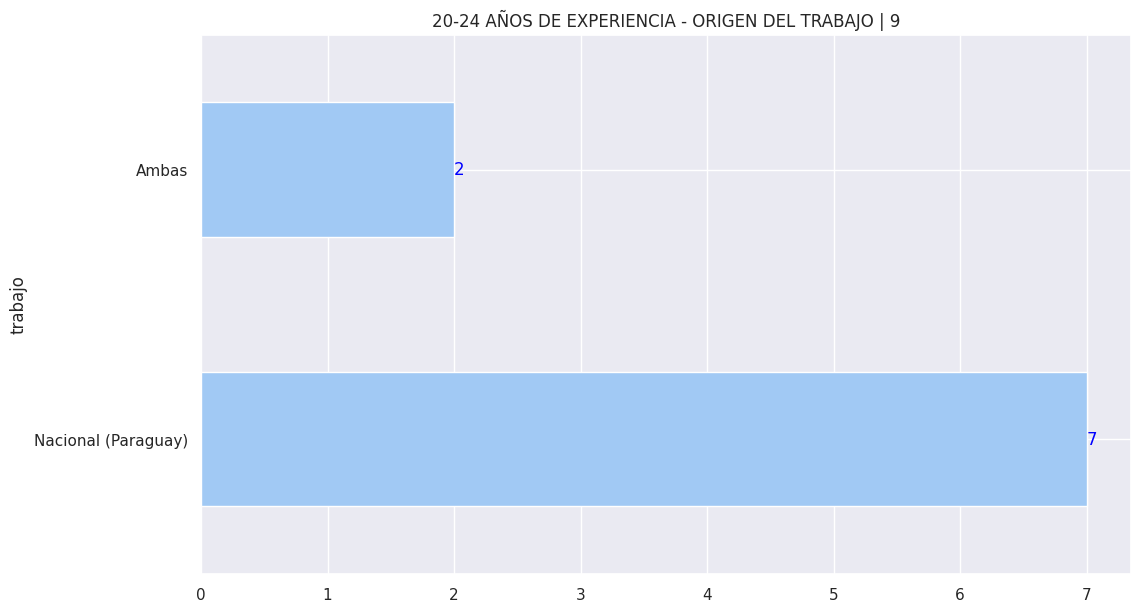

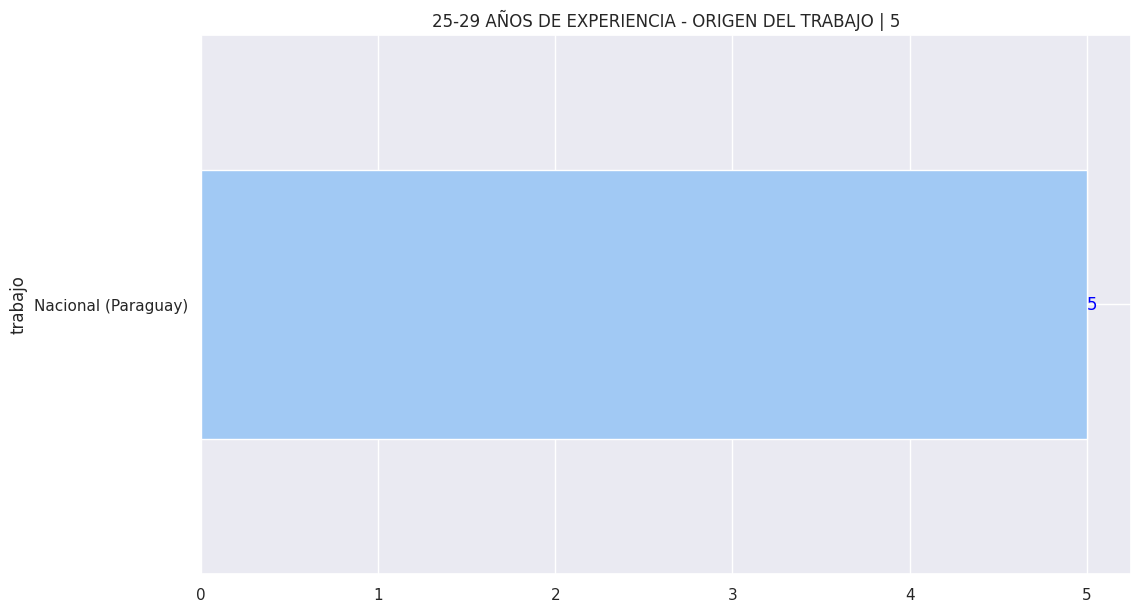

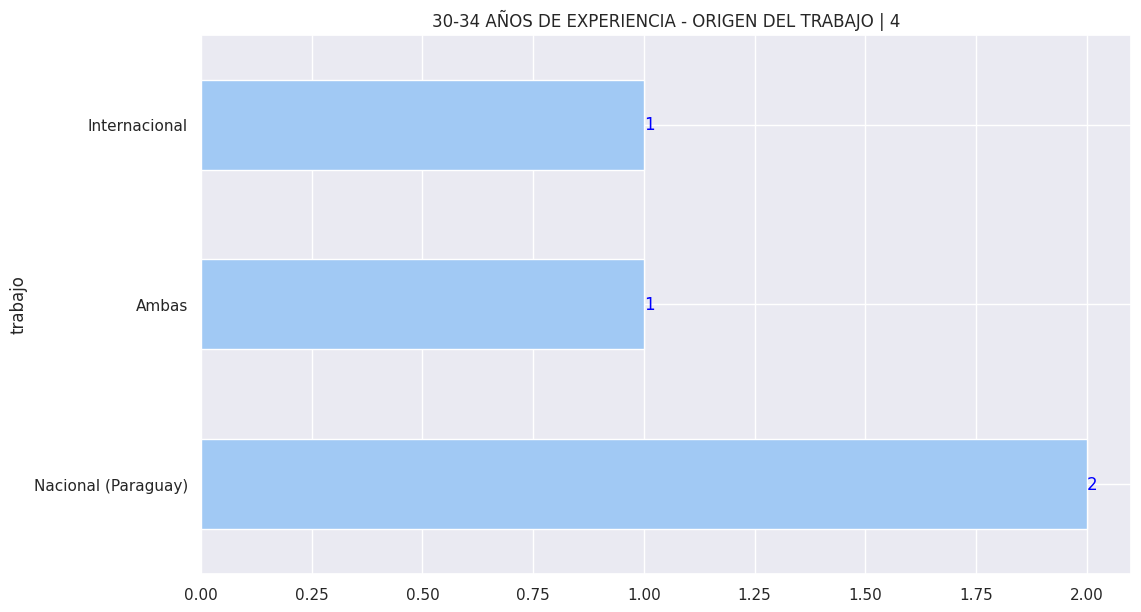

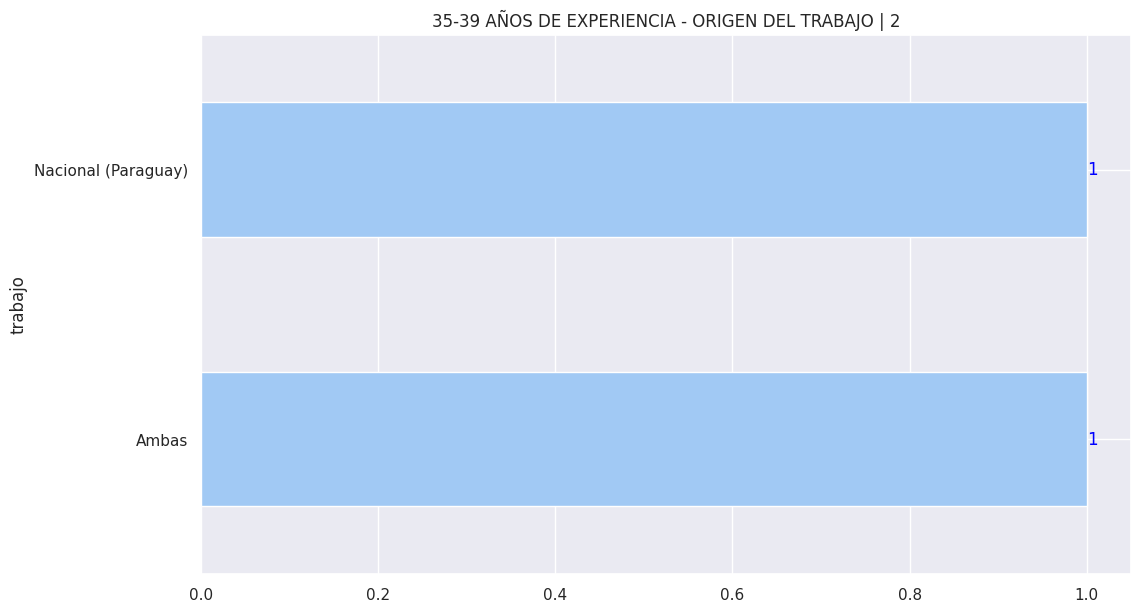

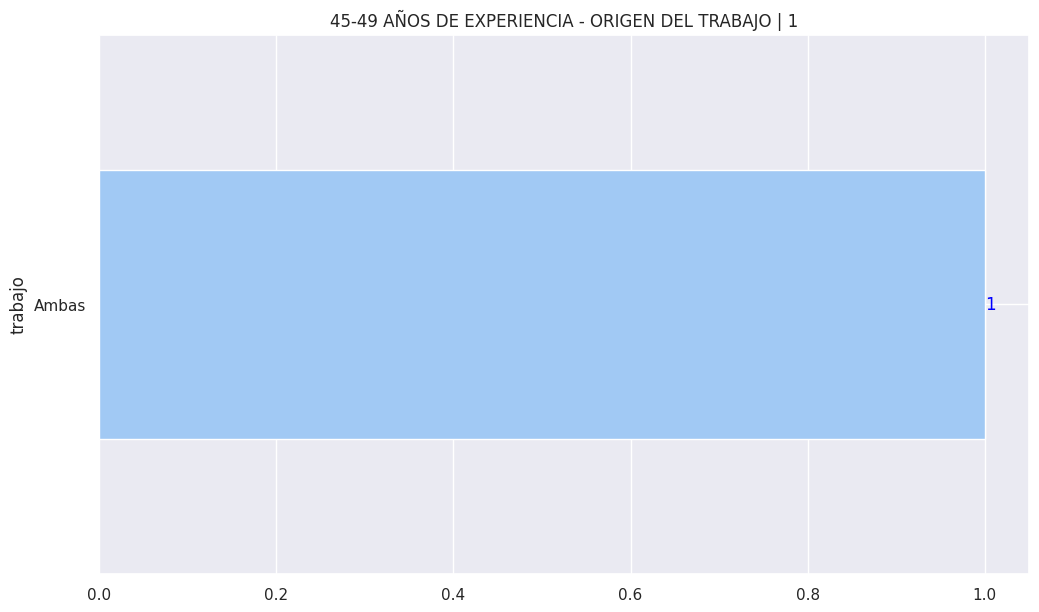

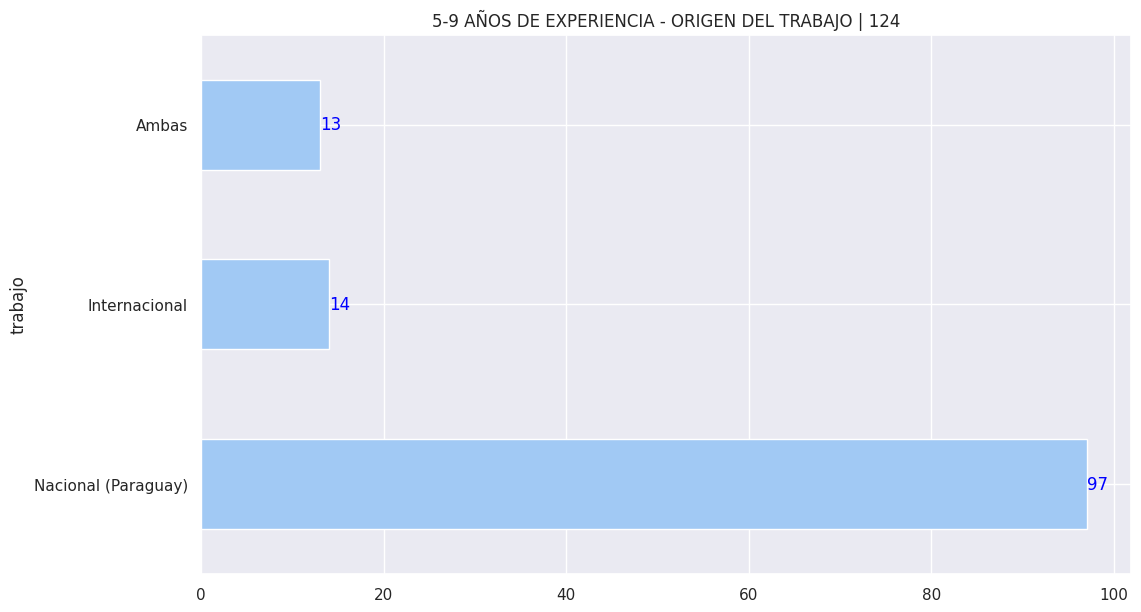

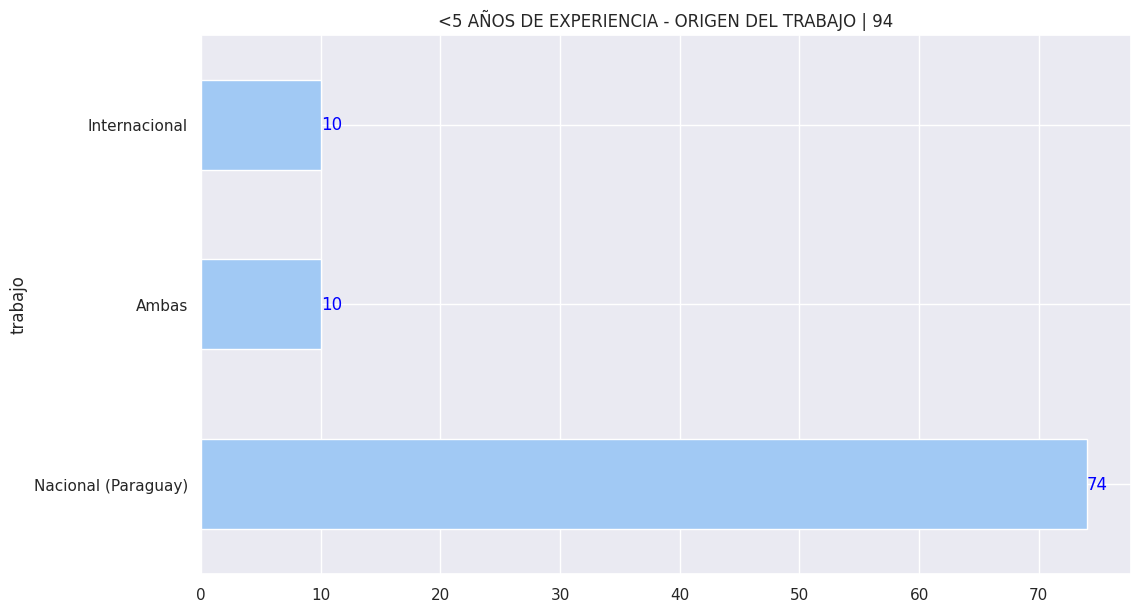

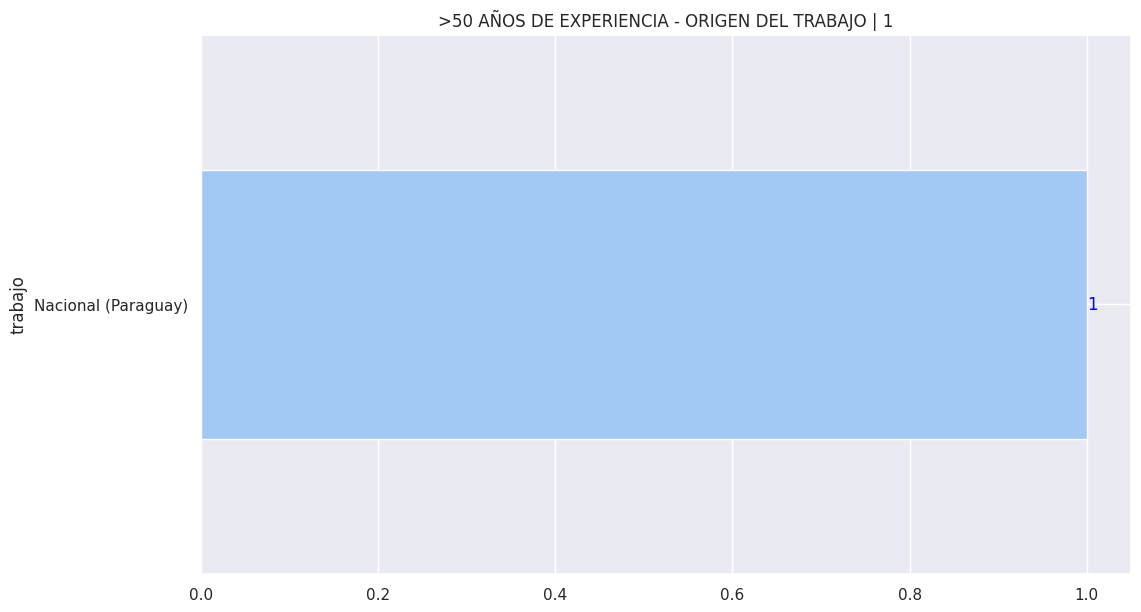

In [624]:
# plt.figure(figsize=(10, 90), dpi=80)


for k, v in enumerate(exp_cats):
    #   plt.subplot(18, 1, k + 1)
    if len(exp.get_group(v)["trabajo"].value_counts()) != 0:
        trab_exp = (
            exp.get_group(v)["trabajo"]
            .value_counts()
            .plot(
                kind="barh",
                title="{0} AÑOS DE EXPERIENCIA - ORIGEN DEL TRABAJO | {1}".format(
                    v, exp.get_group(v)["trabajo"].shape[0]
                ),
                # xlabel="x label de mierda!",
            )
        )
        for l, m in enumerate(exp.get_group(v)["trabajo"].value_counts().values):
            trab_exp.annotate(m, (m, l), va="center", color="blue")

        plt.show()
        print("\n" * 3)
# plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)

### EXPERIENCIA EN TI VS TIPO DE TRABAJO
  - Se explora la experiencia en TI vs el tipo de trabajo que realizan los encuestados.

In [608]:
tt = eh.get_column_uniques(df, "tipo_de_trabajo")

In [609]:
df.columns

Index(['marca_temp', 'modalidad', 'trabajo', 'tipo_de_trabajo', 'devops',
       'programar_x_trabajo', 'exp_en_IT', 'exp_en_programacion',
       '1_linea_de_codigo', 'educacion', 'carr_especialidades',
       'imp_ed_formal', 'genero', 'edad_actual', 'salario_mensual',
       'prog_script_leng', 'lib_frameworks', 'otras_lib_frameworks', 'db',
       'plataformas', 'leng_fav', 'leng_mas_odiado', 'fram_fav',
       'fram_mas_odiado', 'herramientas'],
      dtype='object')

In [625]:
for i in tt:
    d = df[df["tipo_de_trabajo"].str.contains(i)]
    print("Tipo de trabajo. -> ", i)
    print("=" * 35)
    print(d["exp_en_IT"].value_counts(normalize=True))
    print("=" * 29)
    print("\n" * 3)

Tipo de trabajo. ->  Dev de videojuegos
exp_en_IT
10-14    0.50
5-9      0.25
<5       0.25
Name: proportion, dtype: float64




Tipo de trabajo. ->  Dev front-end
exp_en_IT
5-9      0.333333
<5       0.303922
10-14    0.225490
25-29    0.039216
15-19    0.039216
20-24    0.029412
35-39    0.009804
30-34    0.009804
45-49    0.009804
Name: proportion, dtype: float64




Tipo de trabajo. ->  Aps para Esc. o Emp.
exp_en_IT
5-9      0.384615
10-14    0.294872
15-19    0.102564
<5       0.102564
25-29    0.051282
20-24    0.038462
45-49    0.012821
30-34    0.012821
Name: proportion, dtype: float64




Tipo de trabajo. ->  DB Admin
exp_en_IT
5-9      0.347222
10-14    0.277778
<5       0.166667
15-19    0.069444
30-34    0.041667
25-29    0.041667
20-24    0.027778
35-39    0.013889
45-49    0.013889
Name: proportion, dtype: float64




Tipo de trabajo. ->  Dev back-end
exp_en_IT
5-9      0.338235
10-14    0.286765
<5       0.235294
15-19    0.051471
20-24    0.029412
25-29    0.029412
30-

### PRIMERA LINEA DE CODIGO VS OCUPACION

In [611]:
df.columns

Index(['marca_temp', 'modalidad', 'trabajo', 'tipo_de_trabajo', 'devops',
       'programar_x_trabajo', 'exp_en_IT', 'exp_en_programacion',
       '1_linea_de_codigo', 'educacion', 'carr_especialidades',
       'imp_ed_formal', 'genero', 'edad_actual', 'salario_mensual',
       'prog_script_leng', 'lib_frameworks', 'otras_lib_frameworks', 'db',
       'plataformas', 'leng_fav', 'leng_mas_odiado', 'fram_fav',
       'fram_mas_odiado', 'herramientas'],
      dtype='object')

In [612]:
carers = df.groupby("carr_especialidades")

In [613]:
carreras = df["carr_especialidades"].value_counts().keys()

In [614]:
len(carreras)

32

1_linea_de_codigo
<10      0.285714
14-15    0.180952
10-11    0.123810
12-13    0.114286
16-17    0.104762
18-19    0.104762
20-21    0.057143
>30      0.019048
22-23    0.009524
Name: proportion, dtype: float64






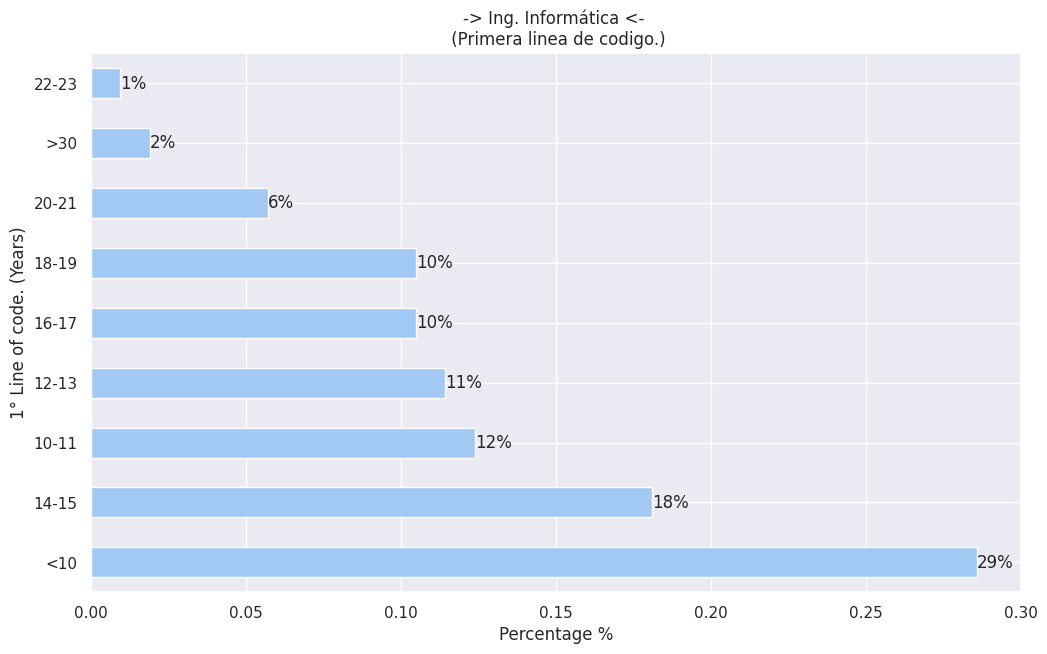





1_linea_de_codigo
<10      0.279412
10-11    0.264706
14-15    0.117647
16-17    0.102941
12-13    0.088235
20-21    0.058824
18-19    0.044118
24-25    0.014706
22-23    0.014706
>30      0.014706
Name: proportion, dtype: float64






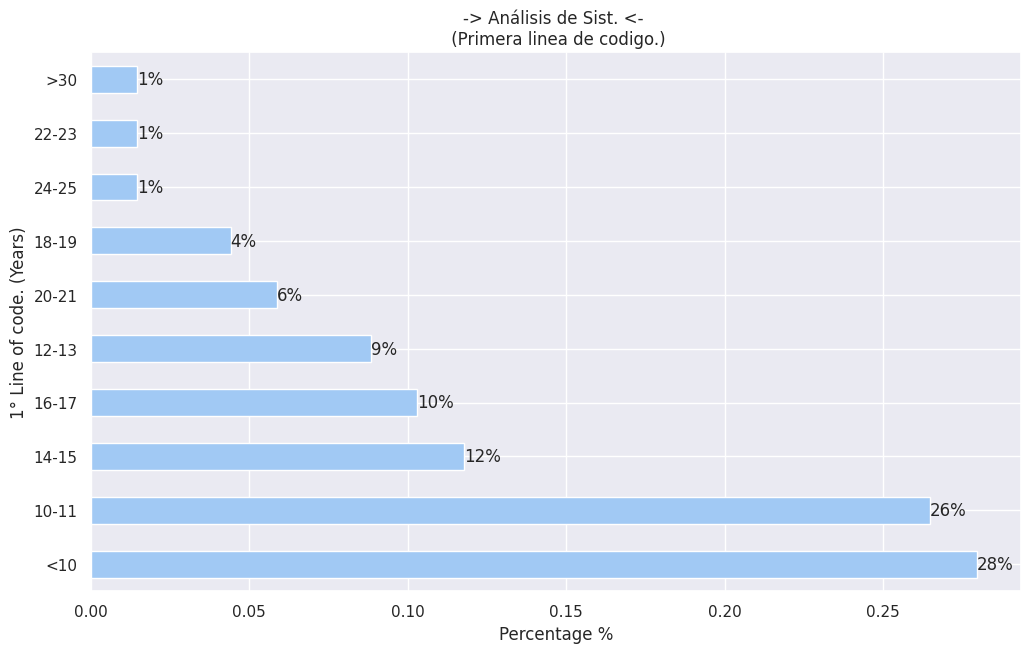





1_linea_de_codigo
10-11    0.272727
<10      0.212121
14-15    0.181818
12-13    0.121212
16-17    0.090909
26-27    0.030303
18-19    0.030303
>30      0.030303
28-29    0.030303
Name: proportion, dtype: float64






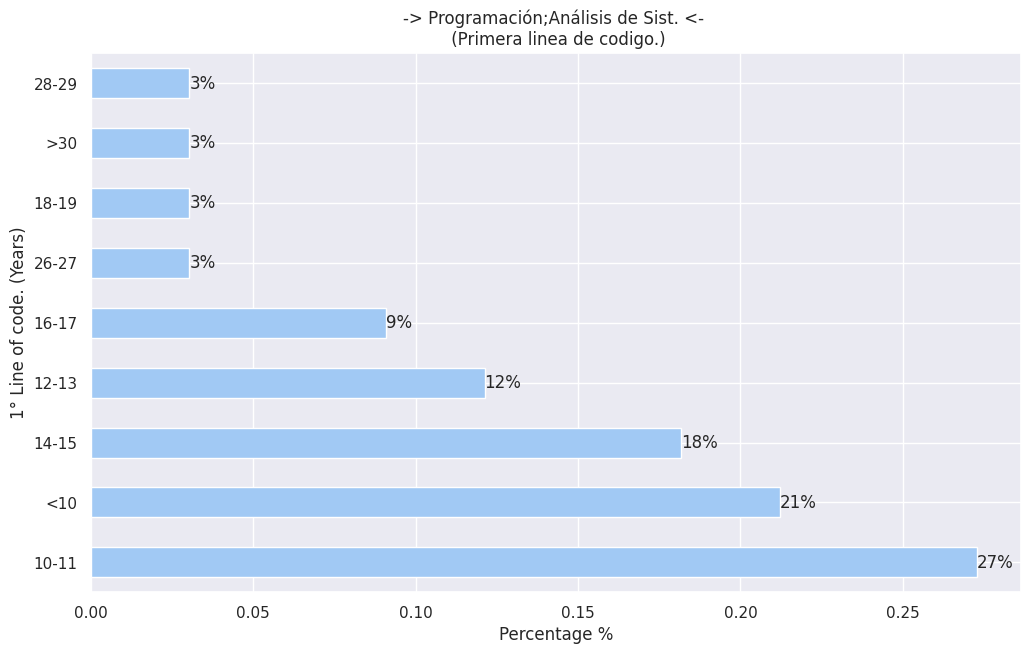





1_linea_de_codigo
<10      0.35
14-15    0.15
18-19    0.15
12-13    0.15
10-11    0.10
24-25    0.05
16-17    0.05
Name: proportion, dtype: float64






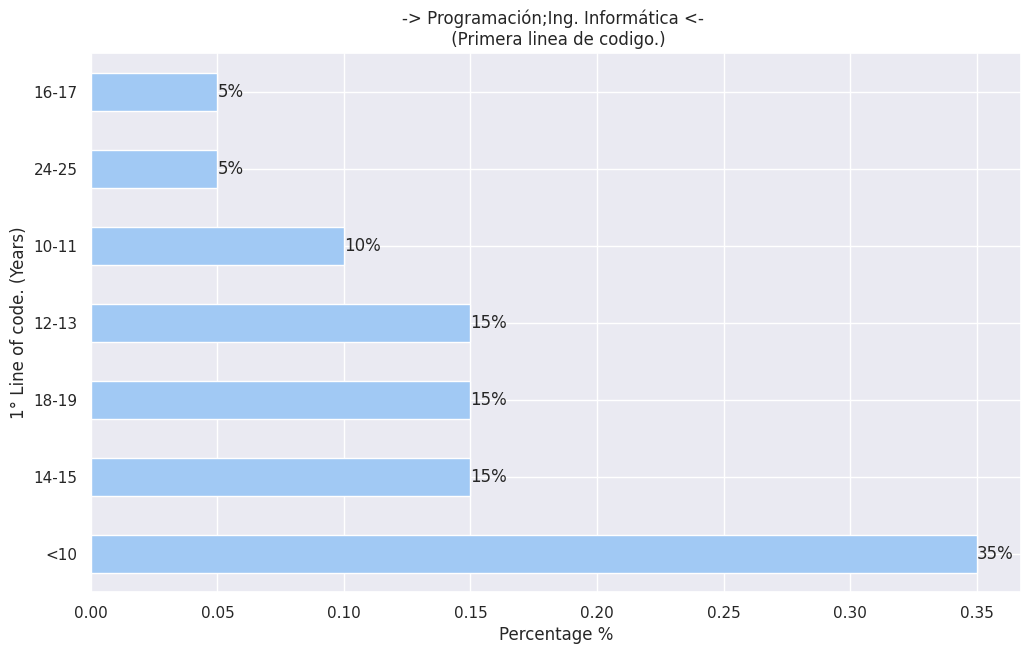





1_linea_de_codigo
<10      0.294118
16-17    0.176471
10-11    0.176471
14-15    0.176471
12-13    0.117647
18-19    0.058824
Name: proportion, dtype: float64






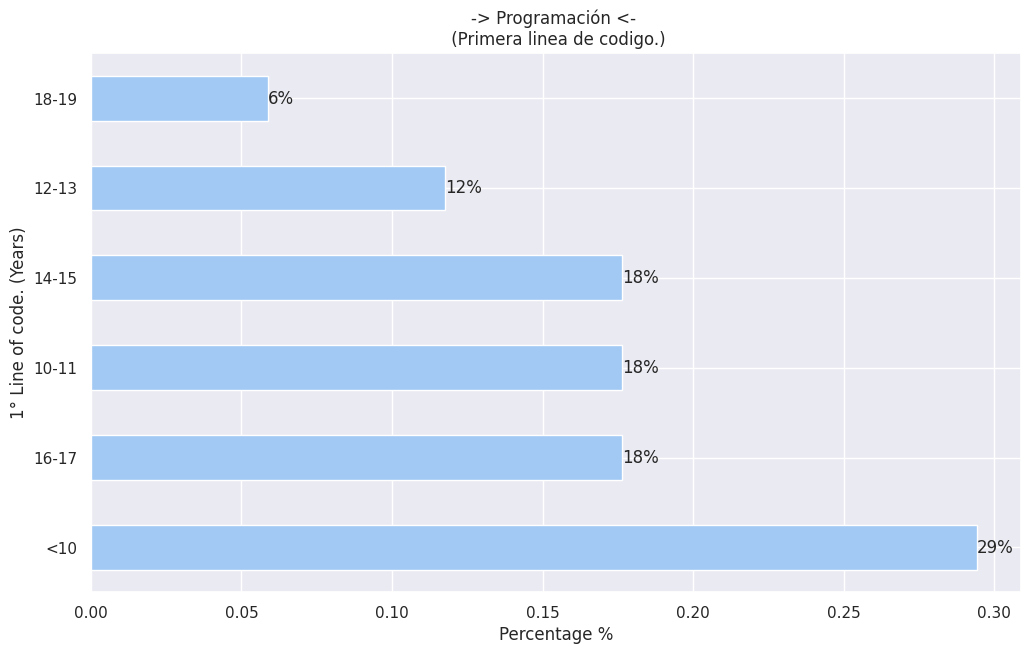





1_linea_de_codigo
<10      0.352941
18-19    0.176471
16-17    0.117647
12-13    0.117647
14-15    0.058824
20-21    0.058824
26-27    0.058824
10-11    0.058824
Name: proportion, dtype: float64






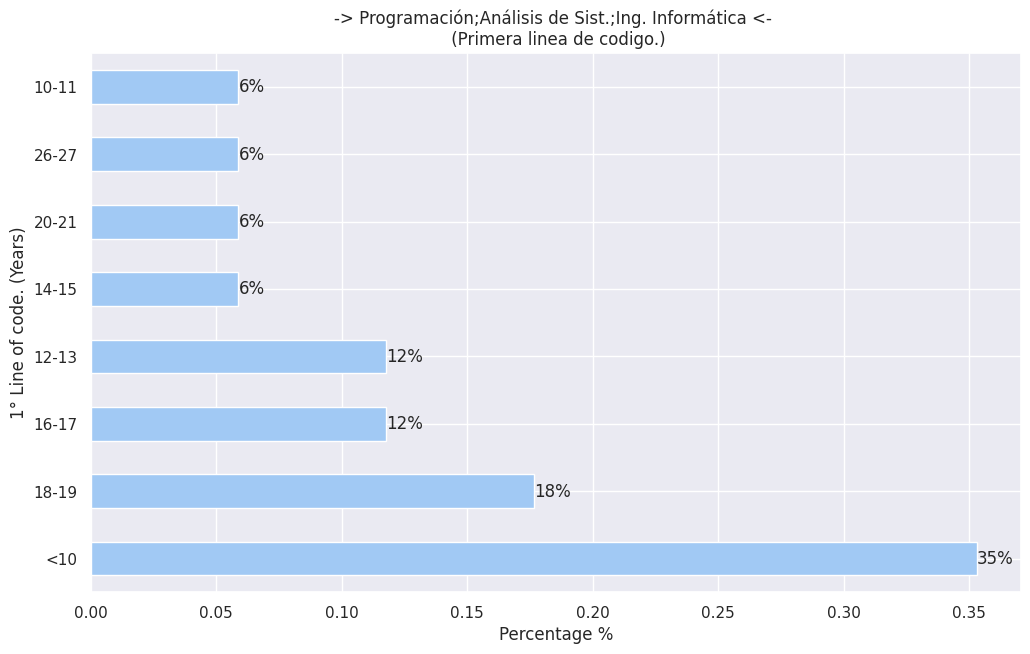





1_linea_de_codigo
14-15    0.333333
<10      0.333333
18-19    0.133333
12-13    0.066667
10-11    0.066667
26-27    0.066667
Name: proportion, dtype: float64






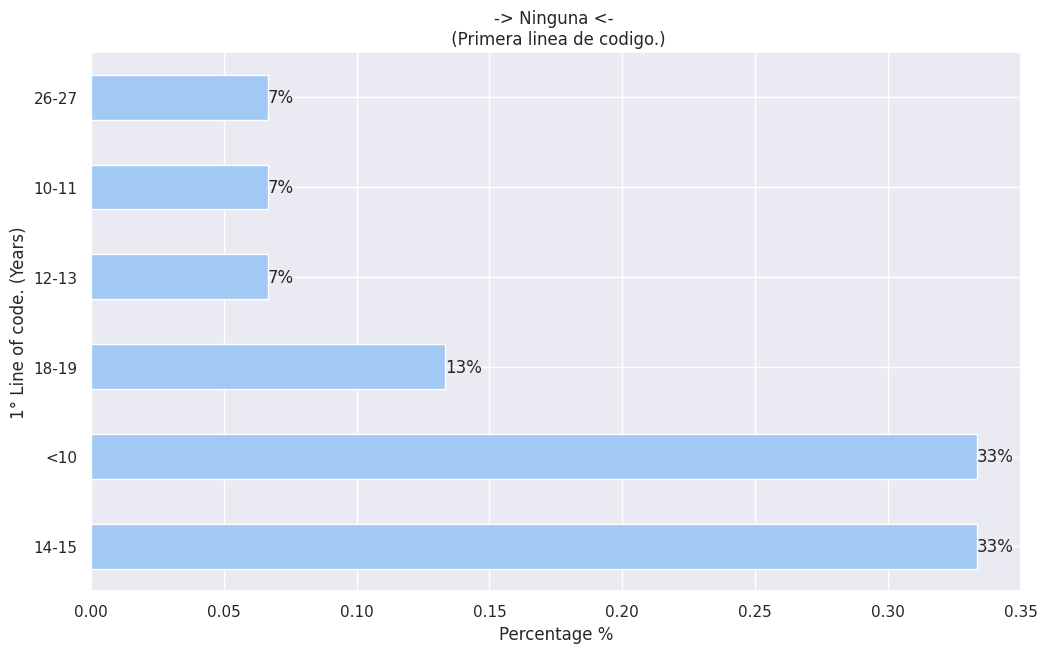





1_linea_de_codigo
12-13    0.272727
20-21    0.181818
<10      0.181818
26-27    0.090909
10-11    0.090909
18-19    0.090909
16-17    0.090909
Name: proportion, dtype: float64






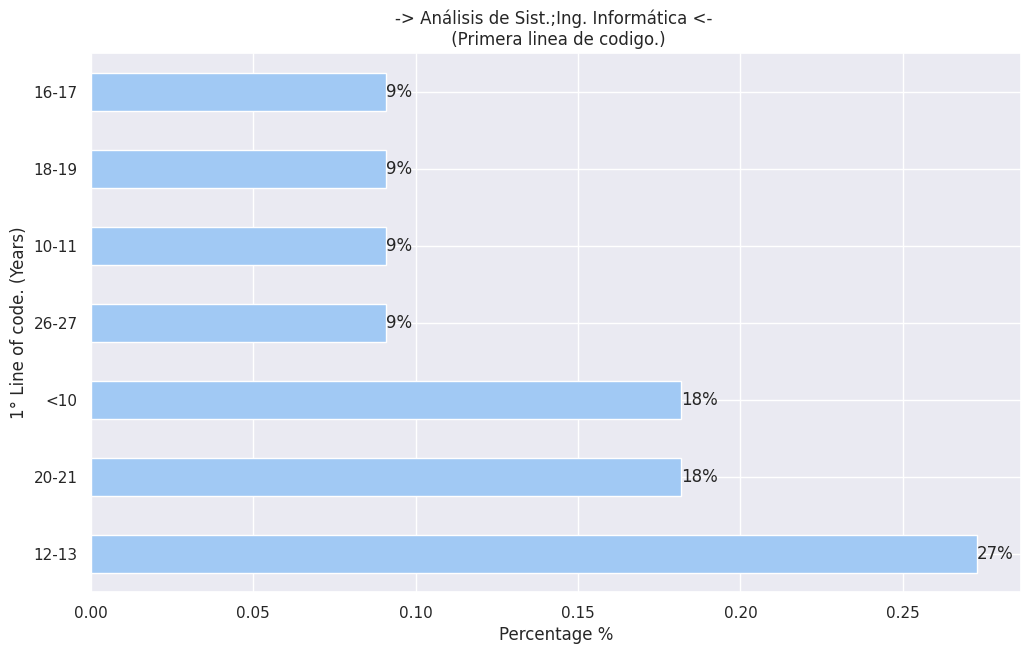





1_linea_de_codigo
12-13    0.166667
10-11    0.166667
20-21    0.166667
<10      0.166667
18-19    0.166667
16-17    0.166667
Name: proportion, dtype: float64






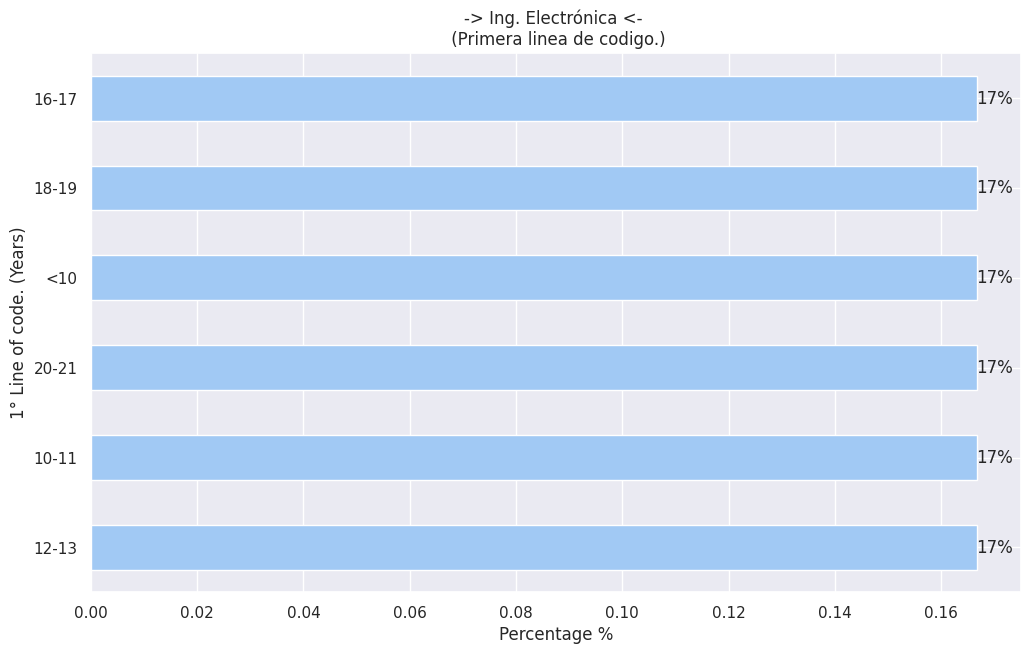





1_linea_de_codigo
<10      0.6
28-29    0.2
14-15    0.2
Name: proportion, dtype: float64






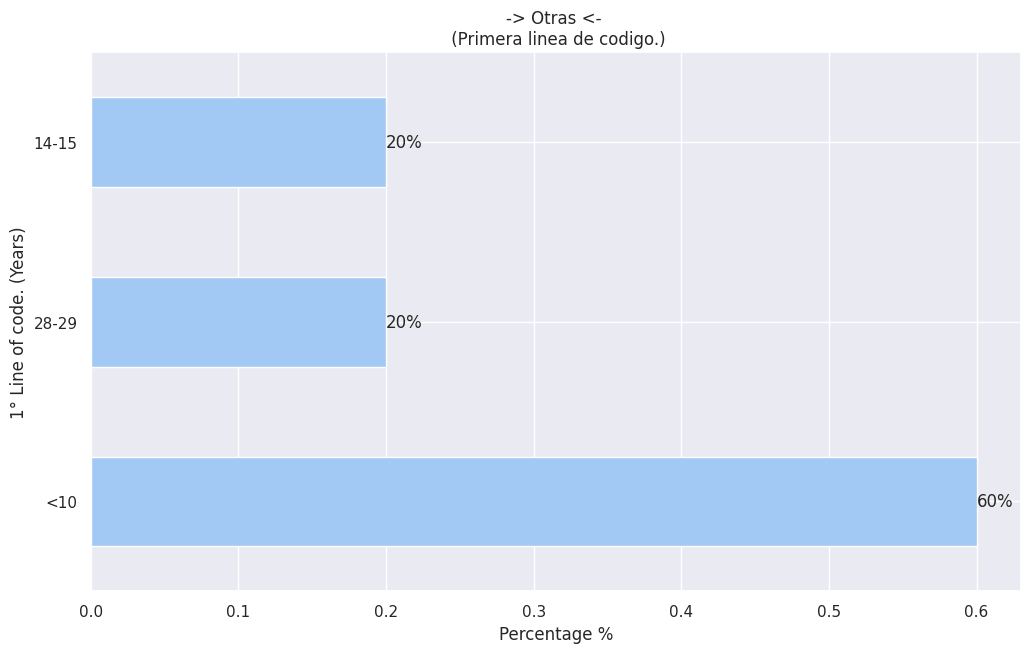





1_linea_de_codigo
14-15    0.4
12-13    0.2
16-17    0.2
10-11    0.2
Name: proportion, dtype: float64






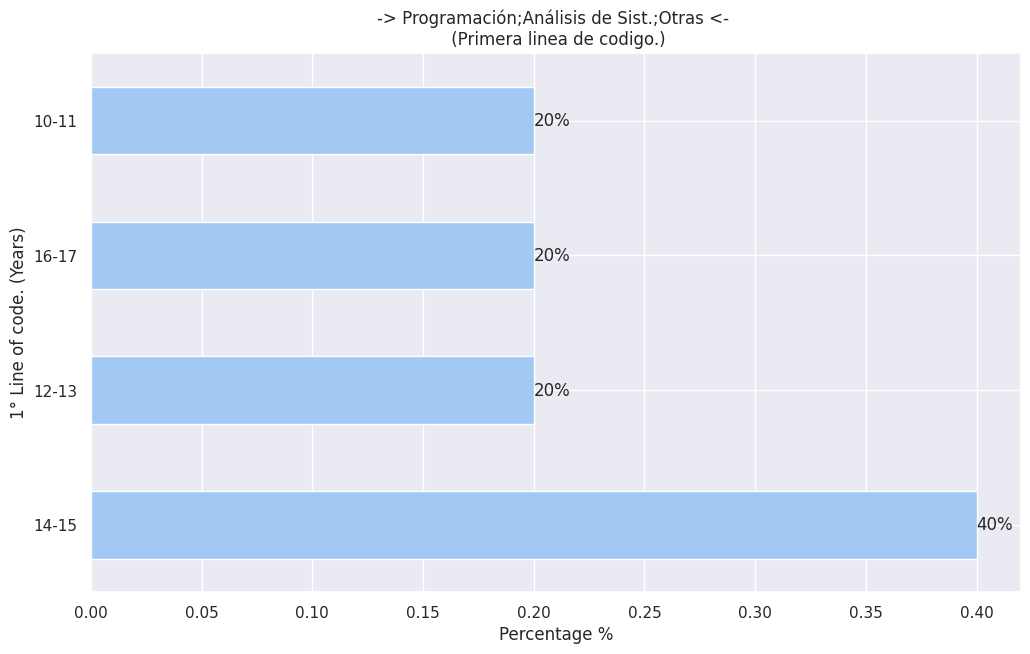





1_linea_de_codigo
14-15    0.25
<10      0.25
12-13    0.25
10-11    0.25
Name: proportion, dtype: float64






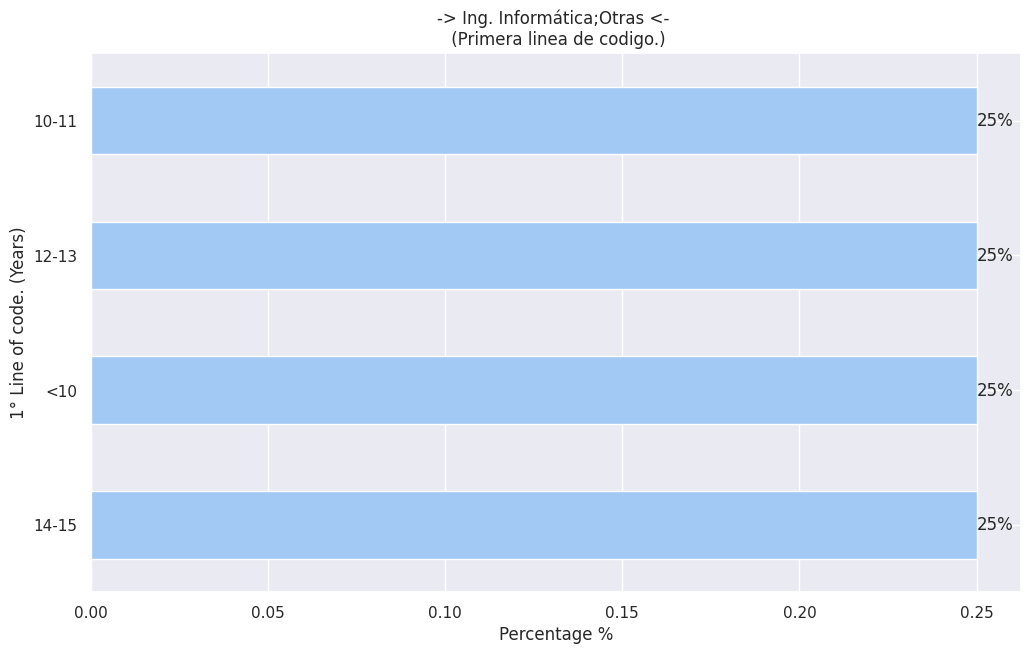





1_linea_de_codigo
<10    1.0
Name: proportion, dtype: float64






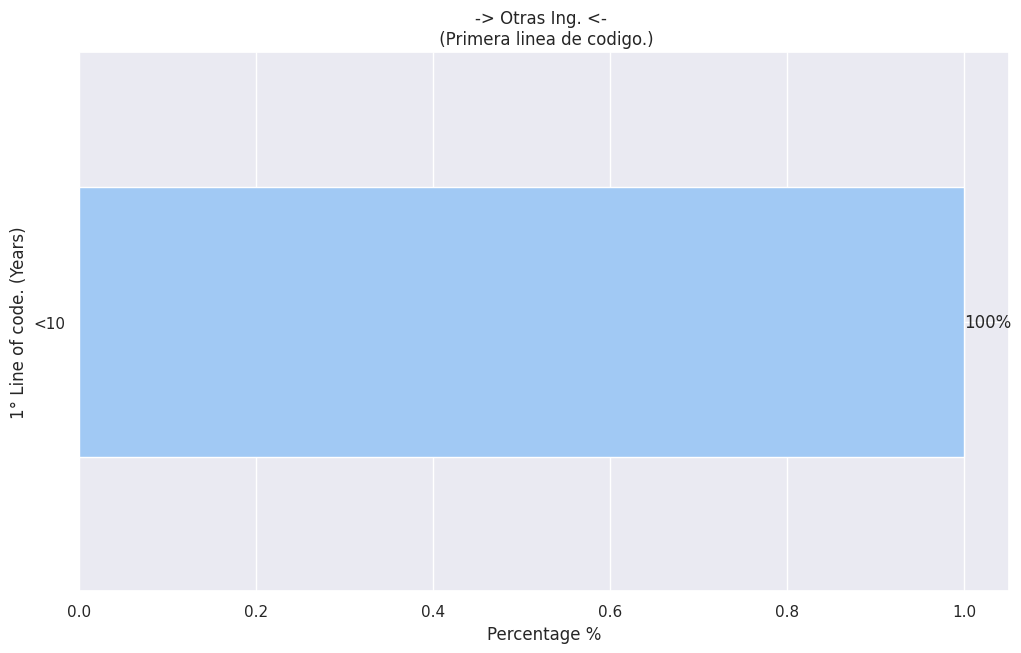





1_linea_de_codigo
10-11    0.333333
<10      0.333333
16-17    0.333333
Name: proportion, dtype: float64






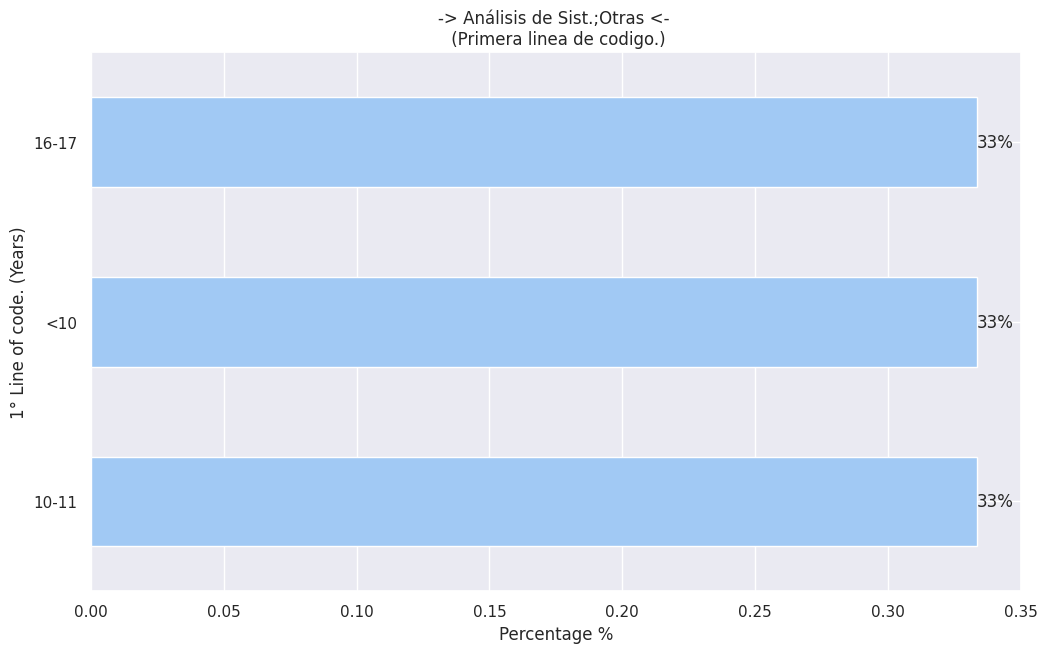





1_linea_de_codigo
10-11    0.333333
12-13    0.333333
24-25    0.333333
Name: proportion, dtype: float64






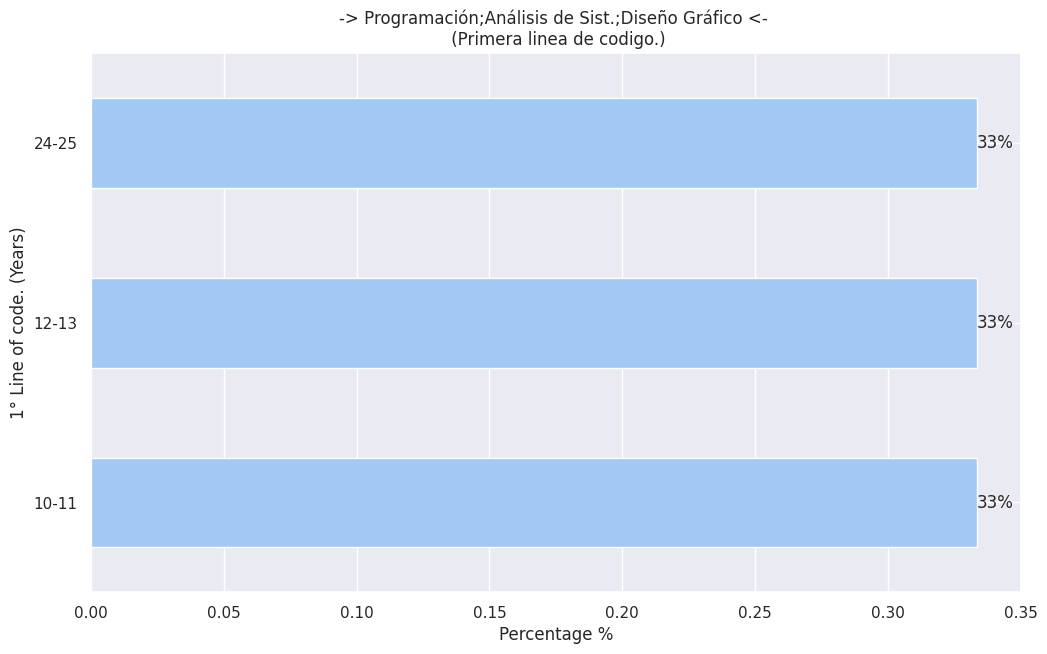





1_linea_de_codigo
>30      0.5
10-11    0.5
Name: proportion, dtype: float64






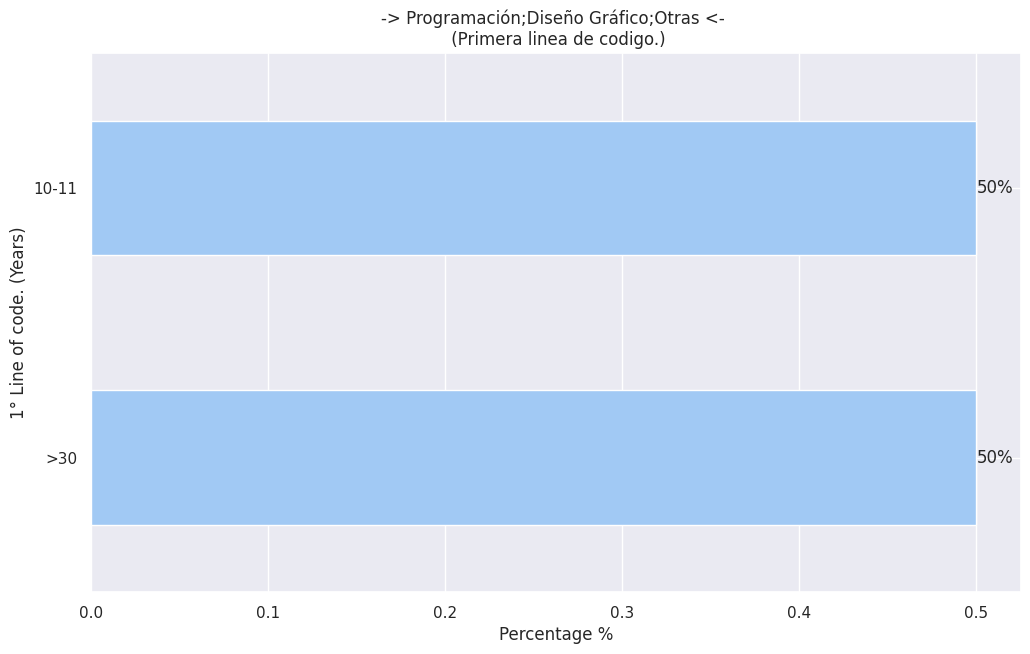





1_linea_de_codigo
28-29    0.5
<10      0.5
Name: proportion, dtype: float64






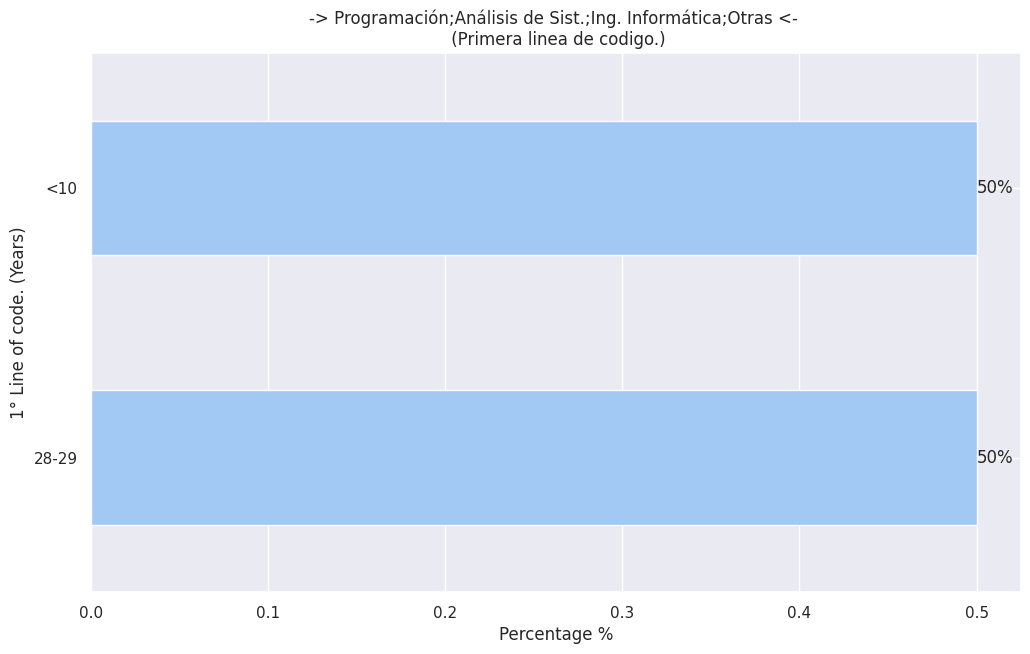





1_linea_de_codigo
<10    1.0
Name: proportion, dtype: float64






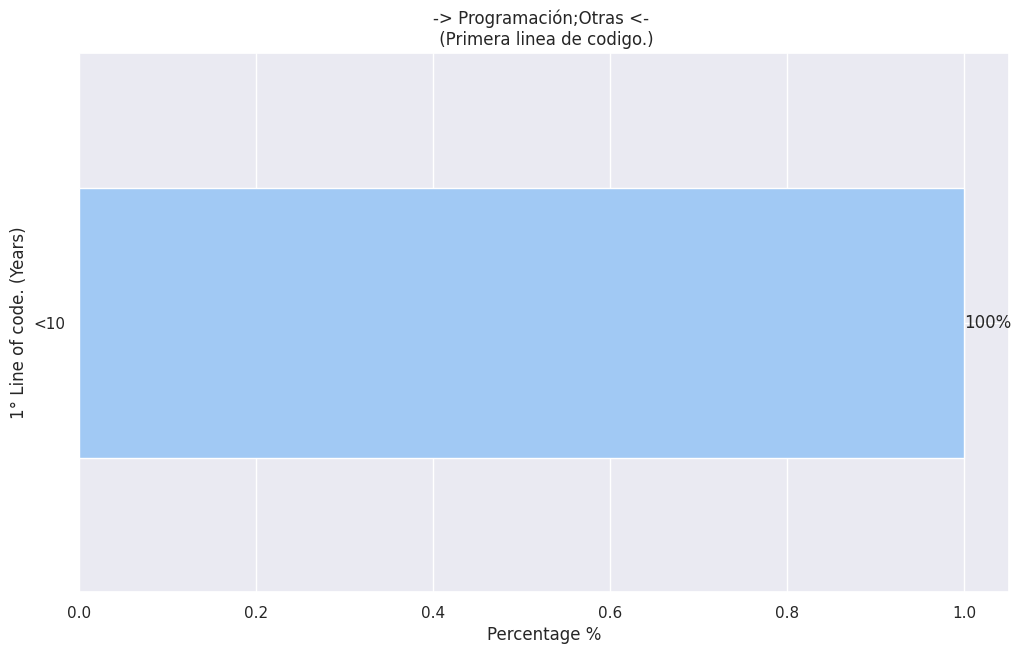





1_linea_de_codigo
20-21    0.5
<10      0.5
Name: proportion, dtype: float64






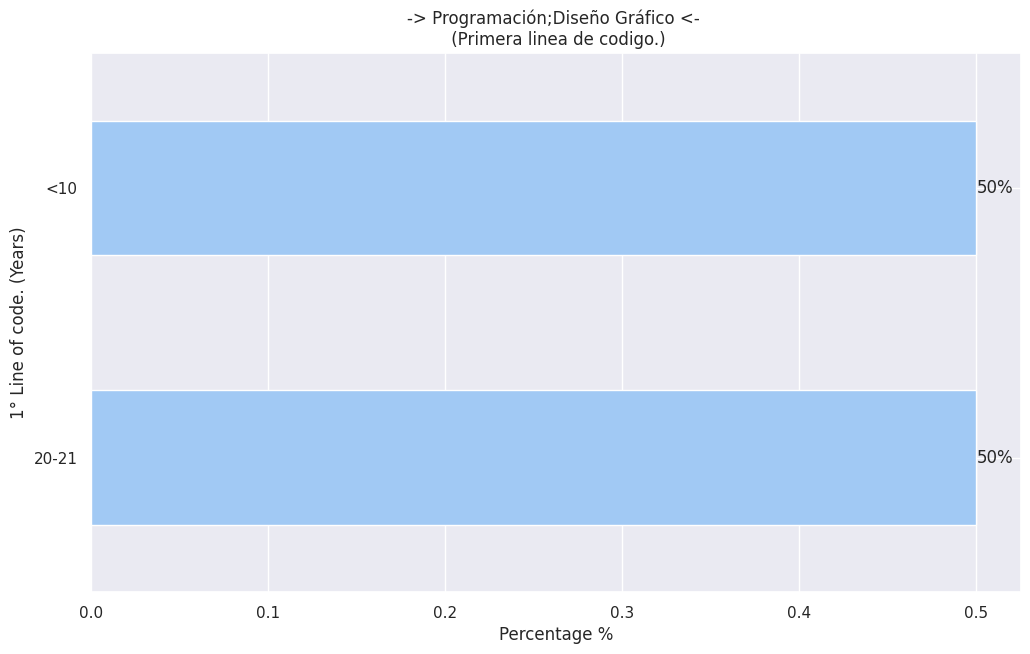





1_linea_de_codigo
22-23    0.5
20-21    0.5
Name: proportion, dtype: float64






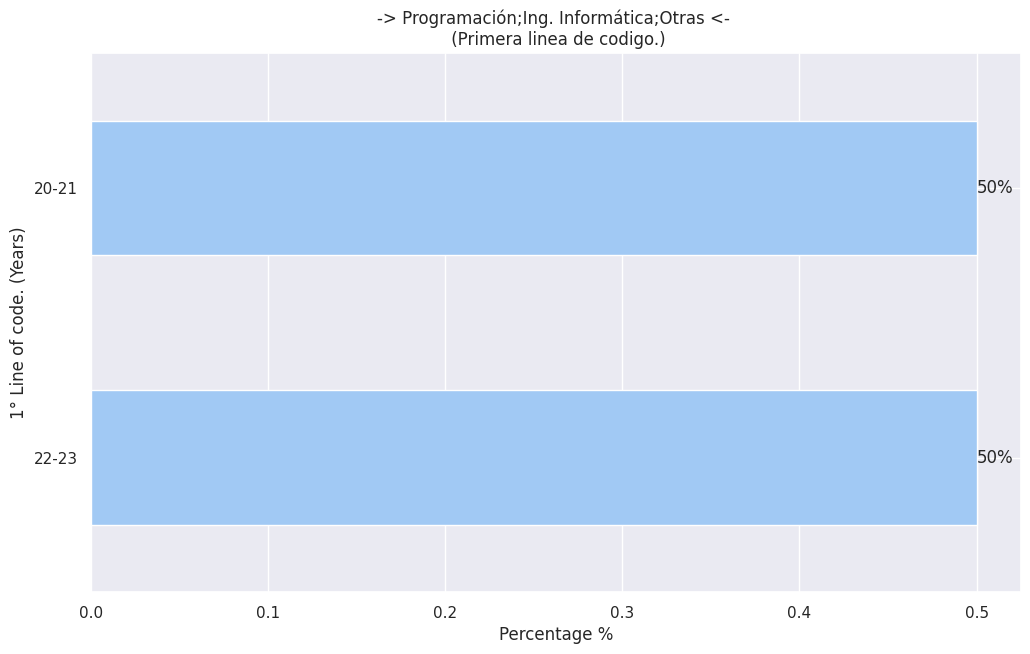





1_linea_de_codigo
<10    1.0
Name: proportion, dtype: float64






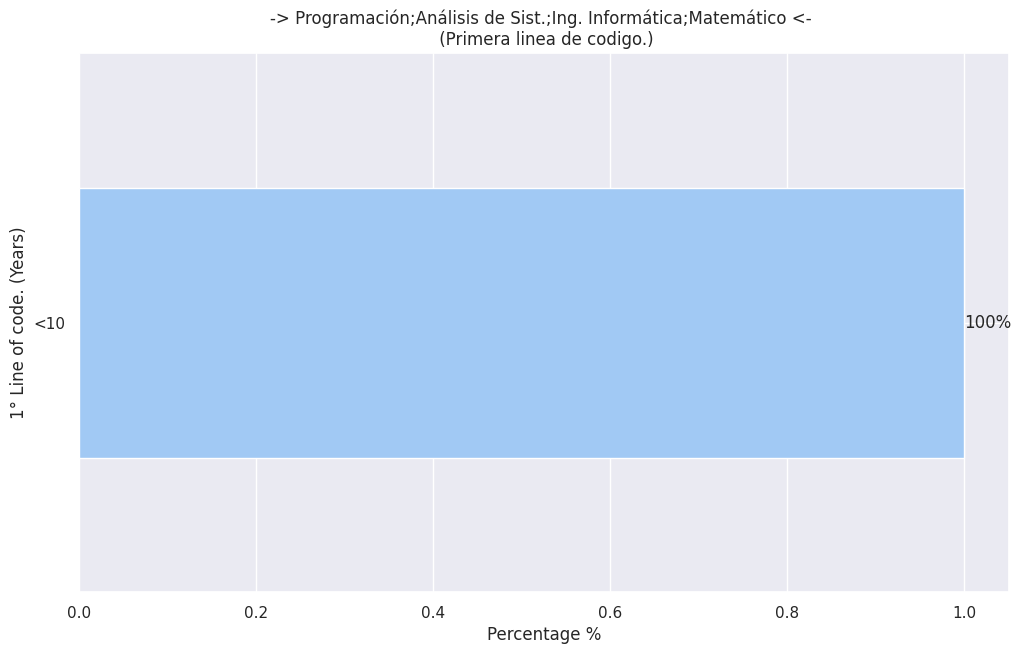





1_linea_de_codigo
<10    1.0
Name: proportion, dtype: float64






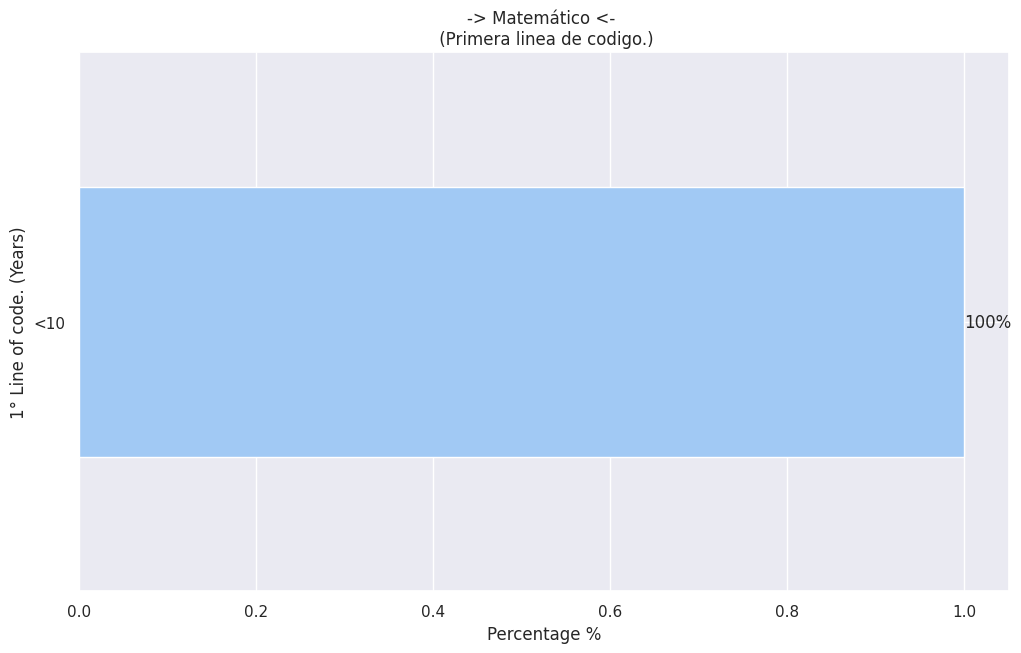





1_linea_de_codigo
14-15    1.0
Name: proportion, dtype: float64






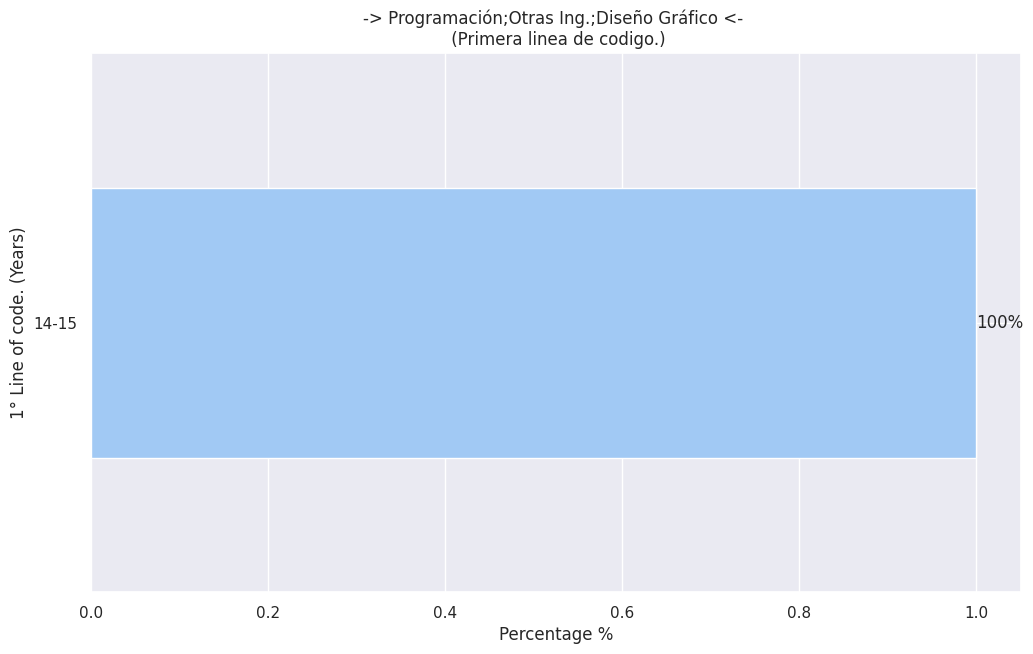





1_linea_de_codigo
22-23    1.0
Name: proportion, dtype: float64






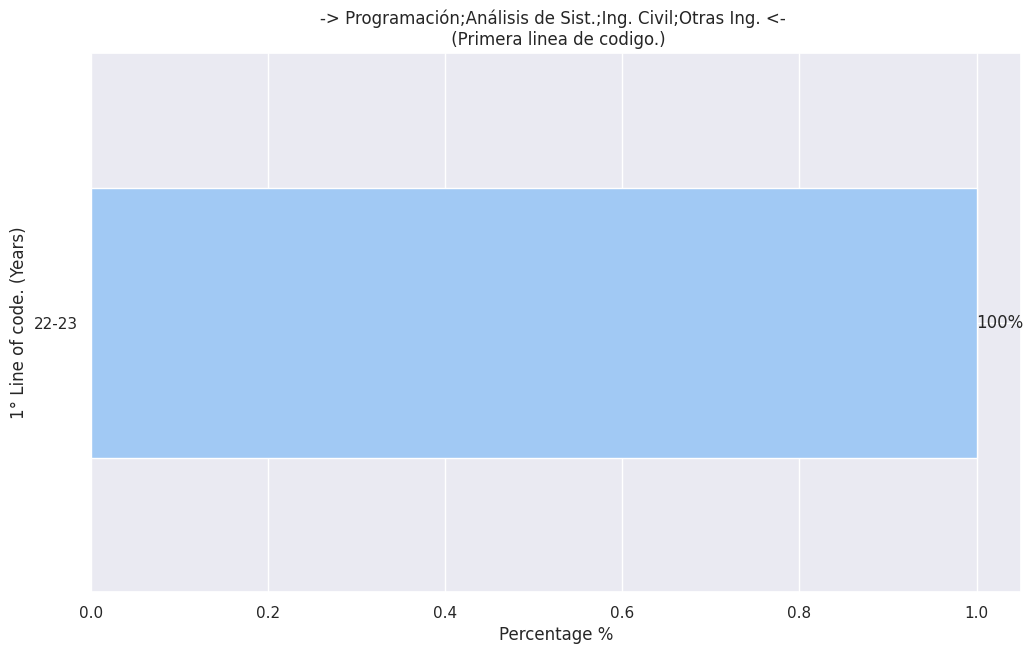





1_linea_de_codigo
<10    1.0
Name: proportion, dtype: float64






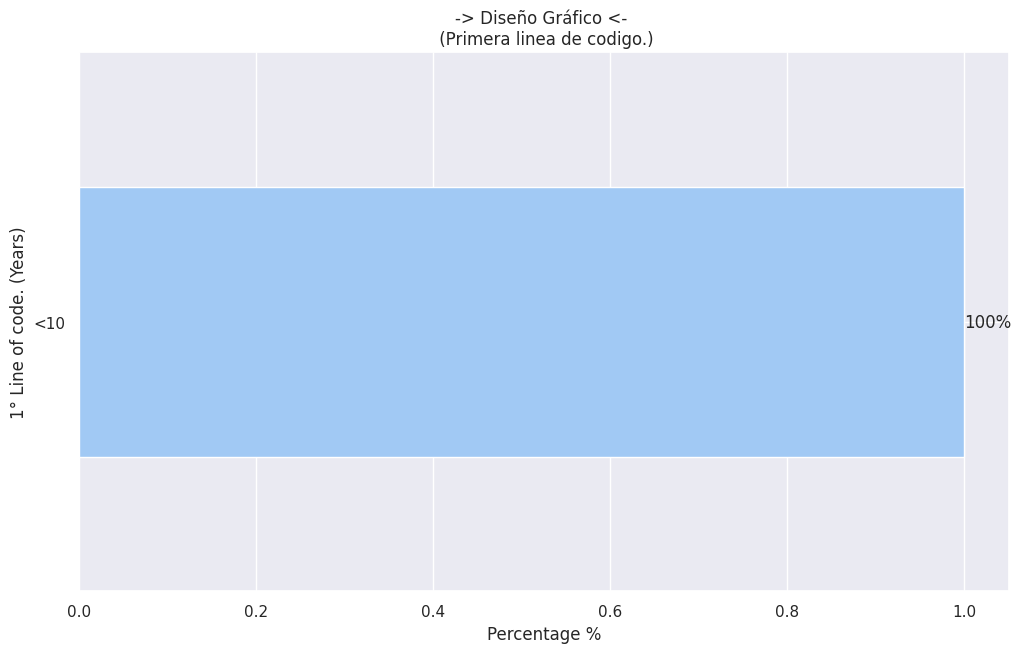





1_linea_de_codigo
<10    1.0
Name: proportion, dtype: float64






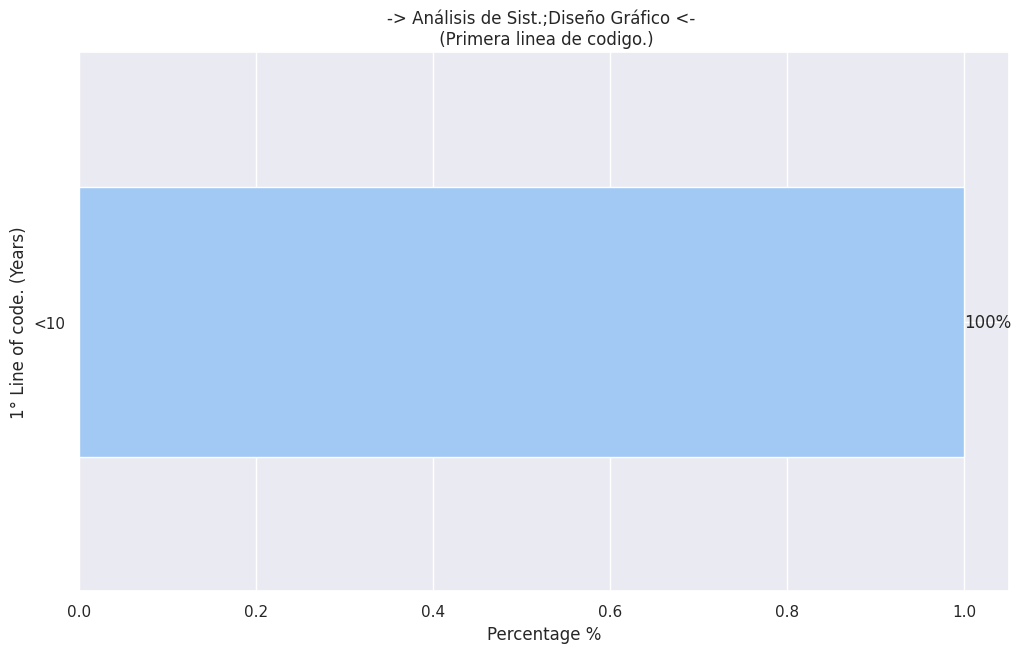





1_linea_de_codigo
18-19    1.0
Name: proportion, dtype: float64






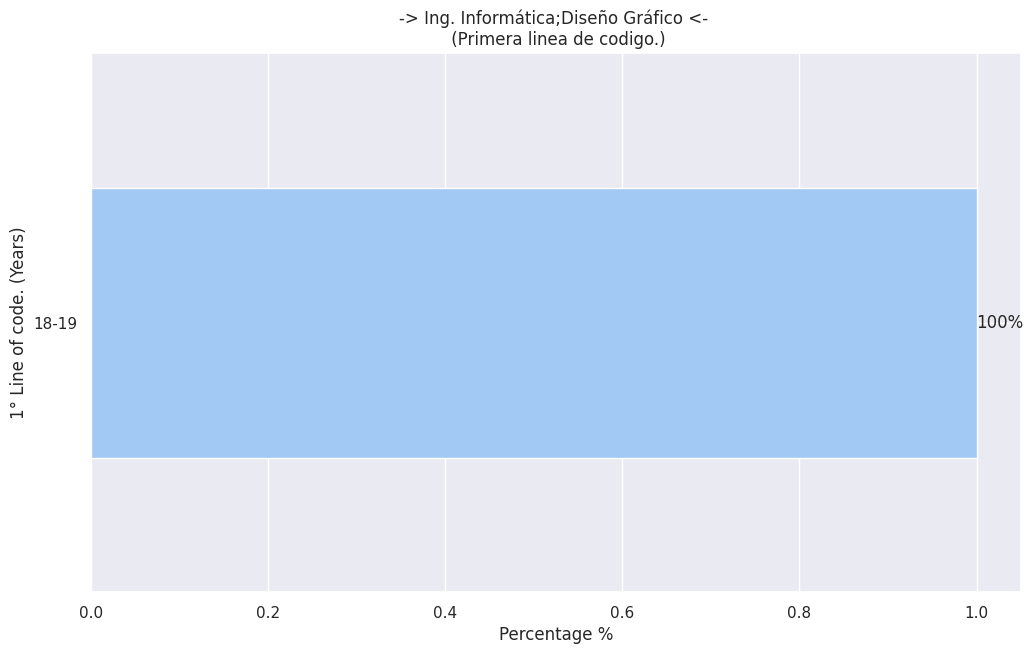





1_linea_de_codigo
<10    1.0
Name: proportion, dtype: float64






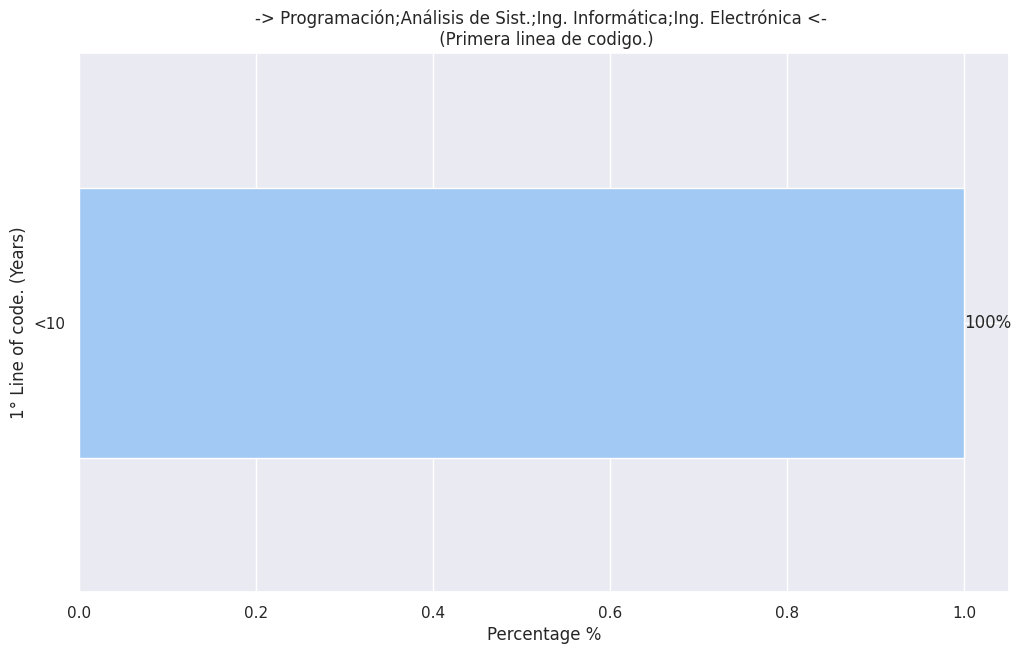





1_linea_de_codigo
<10    1.0
Name: proportion, dtype: float64






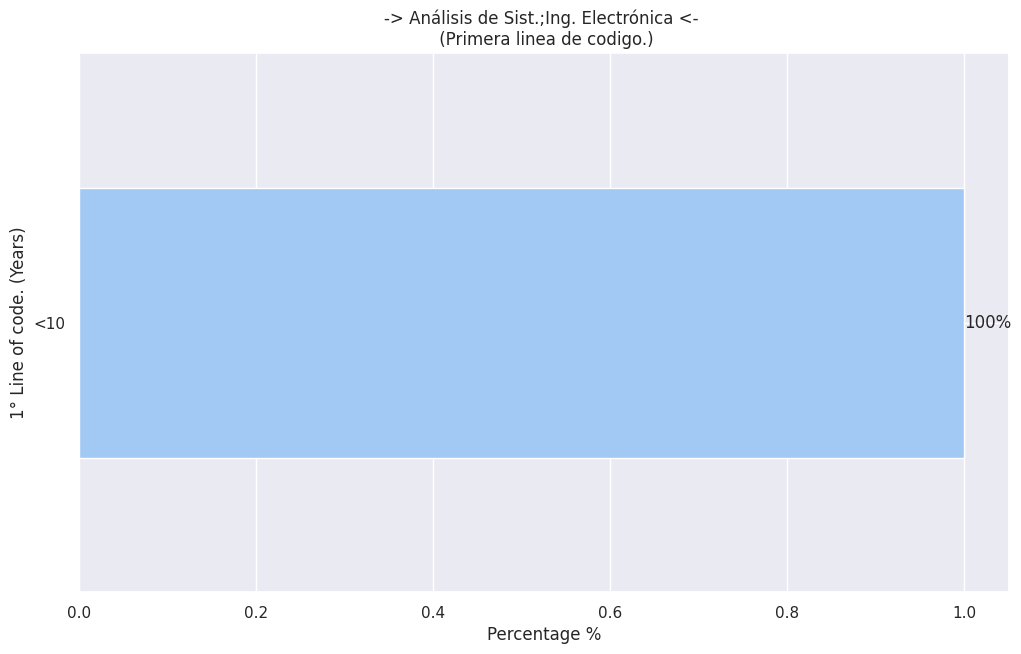





1_linea_de_codigo
14-15    1.0
Name: proportion, dtype: float64






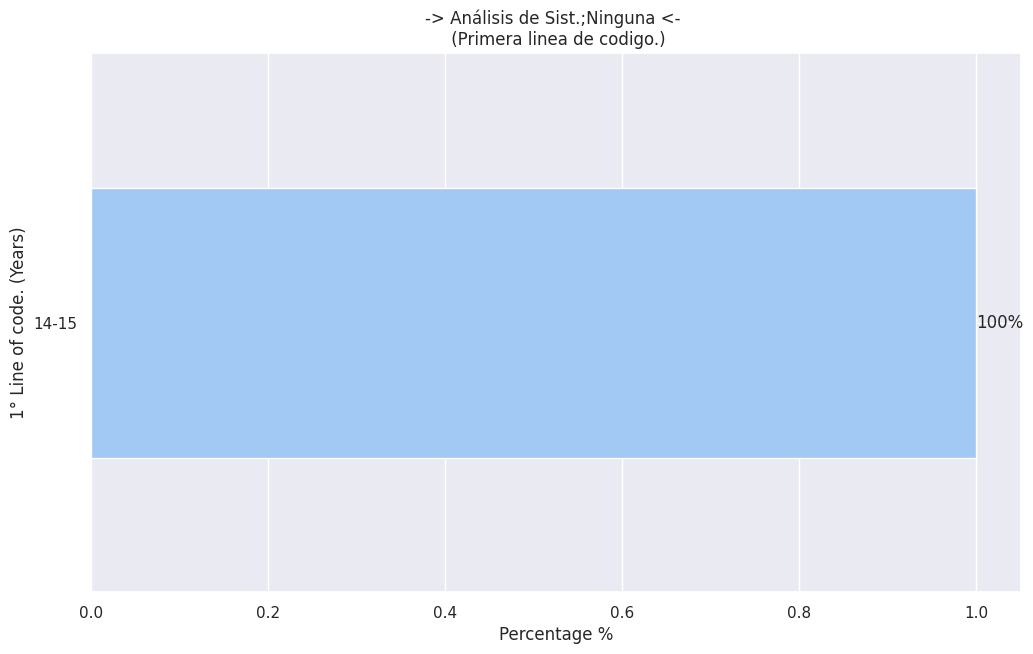





1_linea_de_codigo
>30    1.0
Name: proportion, dtype: float64






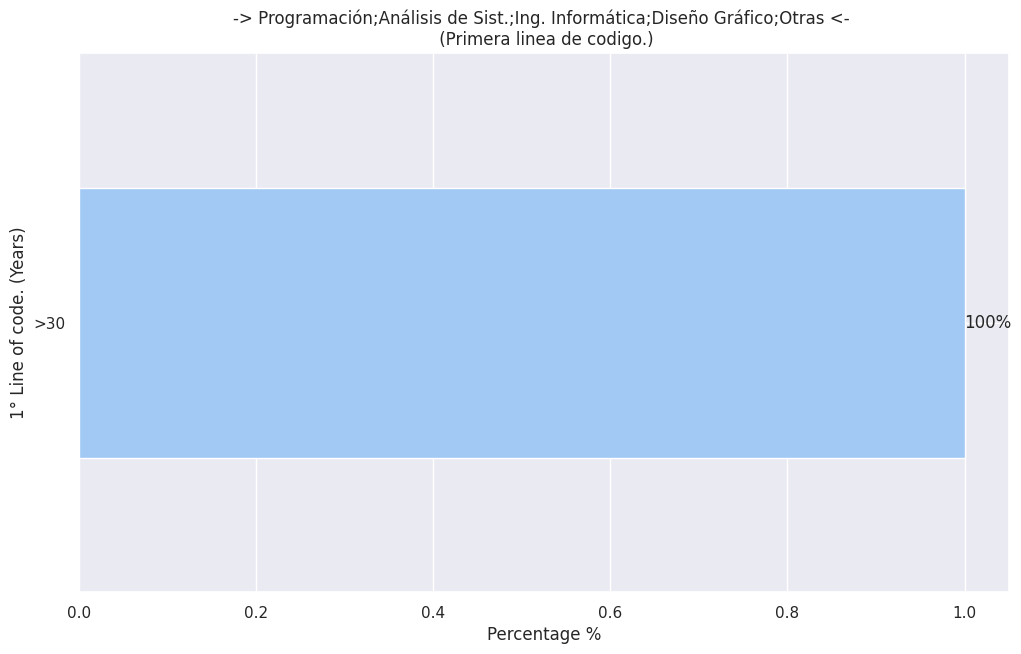





1_linea_de_codigo
10-11    1.0
Name: proportion, dtype: float64






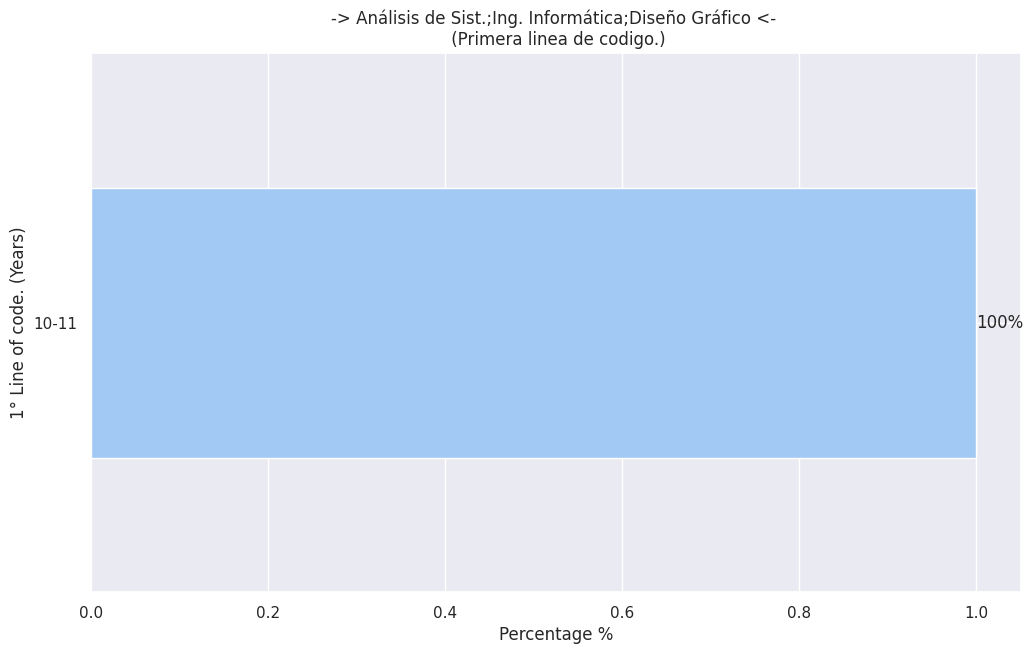

In [615]:
# plt.figure(figsize=(10, 90), dpi=80)


for k, v in enumerate(carreras):
    #   plt.subplot(35, 1, k + 1)
    a_df = carers.get_group(v)["1_linea_de_codigo"].value_counts(normalize=True)
    print(a_df)
    print("\n" * 3)
    a_plot = a_df.plot(title=f"-> {v} <- \n (Primera linea de codigo.)", kind="barh")

    for l, m in enumerate(a_df.values):
        # a_plot.annotate("{0:.1f}".format(m * 100), (m, l), va="center", color="blue")
        a_plot.annotate(eh.get_percentage(m), (m, l), va="center")
    plt.xlabel("Percentage %")
    plt.ylabel("1° Line of code. (Years)")
    plt.show()
    print("\n" * 3)


# plt.subplots_adjust(left=0.1, bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=1)

# Genero vs. 1 linea de codigo.

In [616]:
df.columns

Index(['marca_temp', 'modalidad', 'trabajo', 'tipo_de_trabajo', 'devops',
       'programar_x_trabajo', 'exp_en_IT', 'exp_en_programacion',
       '1_linea_de_codigo', 'educacion', 'carr_especialidades',
       'imp_ed_formal', 'genero', 'edad_actual', 'salario_mensual',
       'prog_script_leng', 'lib_frameworks', 'otras_lib_frameworks', 'db',
       'plataformas', 'leng_fav', 'leng_mas_odiado', 'fram_fav',
       'fram_mas_odiado', 'herramientas'],
      dtype='object')

In [617]:
df["1_linea_de_codigo"].fillna("", inplace=True)
df["genero"].fillna("Q", inplace=True)

In [618]:
gen_linea_cod_groups = df.groupby(["genero", "1_linea_de_codigo"])

In [619]:
print(len(gen_linea_cod_groups.groups.keys()))

33


In [620]:
for i in gen_linea_cod_groups.groups.keys():
    g = gen_linea_cod_groups.get_group(i)
    print("Primera linea de codigo vs experiencia en IT. ------------> ", i)
    print(g["exp_en_IT"].value_counts(normalize=True))
    print("\n" * 3)

Primera linea de codigo vs experiencia en IT. ------------>  ('DONT SHARE', '10-11')
exp_en_IT
5-9      0.5
10-14    0.5
Name: proportion, dtype: float64




Primera linea de codigo vs experiencia en IT. ------------>  ('DONT SHARE', '14-15')
exp_en_IT
<5    1.0
Name: proportion, dtype: float64




Primera linea de codigo vs experiencia en IT. ------------>  ('DONT SHARE', '18-19')
exp_en_IT
45-49    1.0
Name: proportion, dtype: float64




Primera linea de codigo vs experiencia en IT. ------------>  ('DONT SHARE', '20-21')
exp_en_IT
10-14    1.0
Name: proportion, dtype: float64




Primera linea de codigo vs experiencia en IT. ------------>  ('DONT SHARE', '22-23')
exp_en_IT
<5    1.0
Name: proportion, dtype: float64




Primera linea de codigo vs experiencia en IT. ------------>  ('MAN', '')
exp_en_IT
5-9      0.5
10-14    0.5
Name: proportion, dtype: float64




Primera linea de codigo vs experiencia en IT. ------------>  ('MAN', '10-11')
exp_en_IT
5-9      0.400000
10-14    0.33333